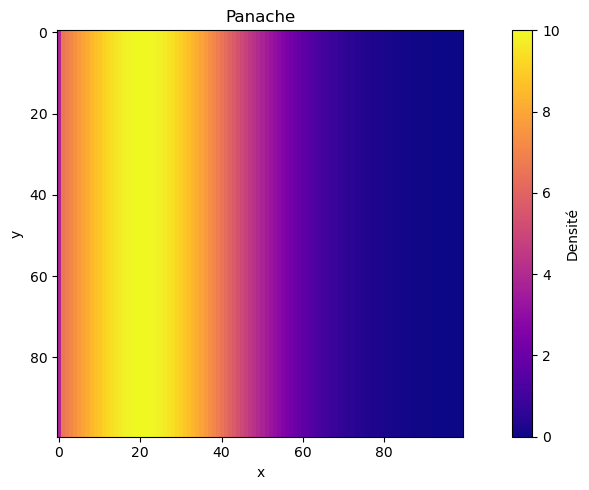

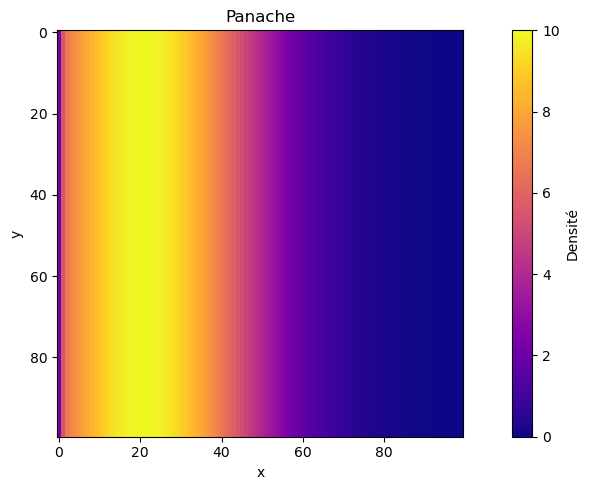

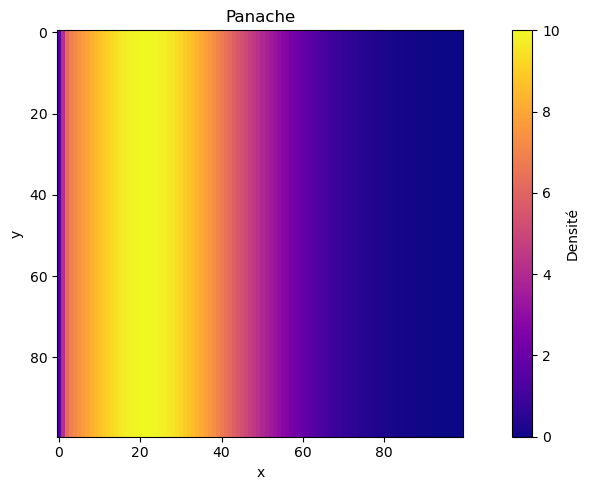

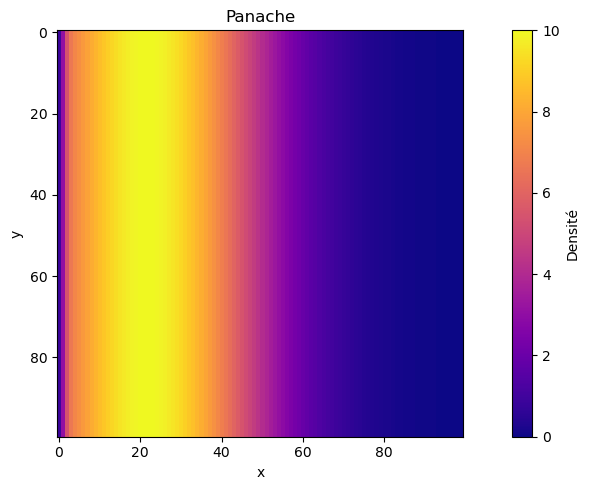

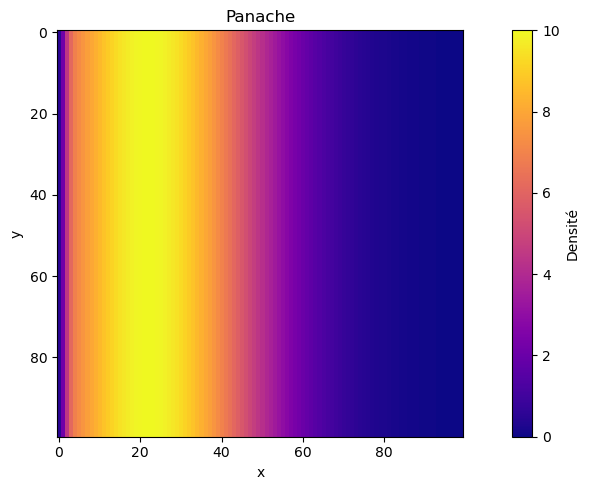

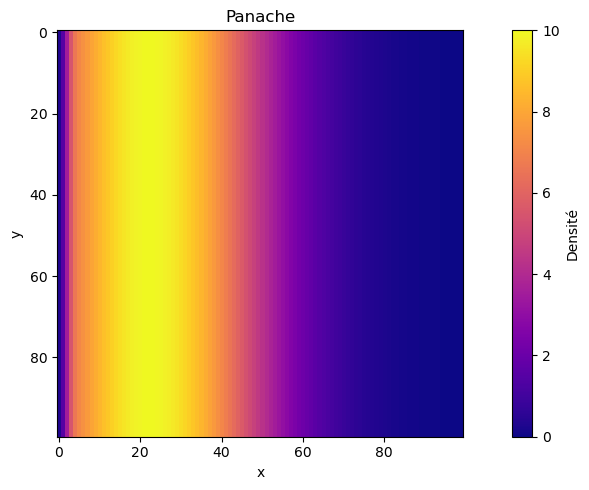

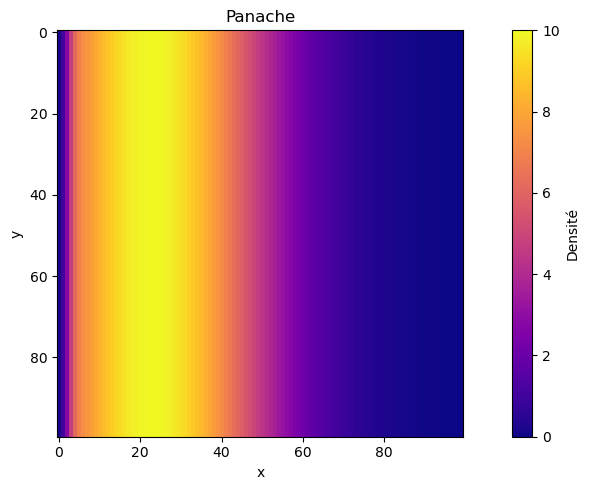

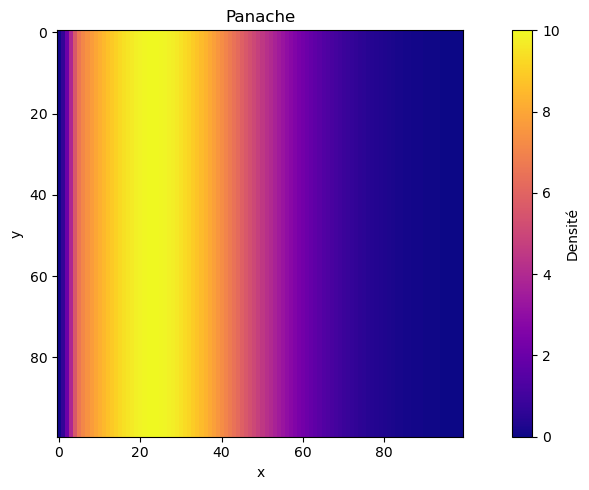

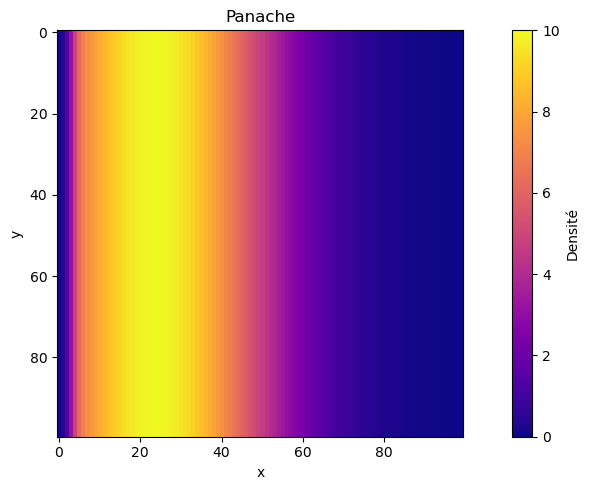

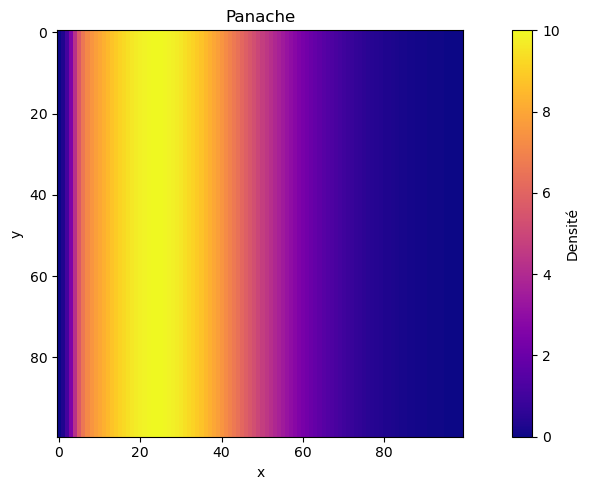

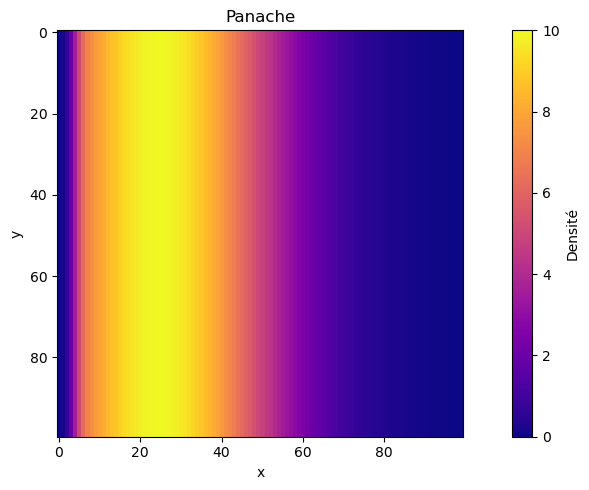

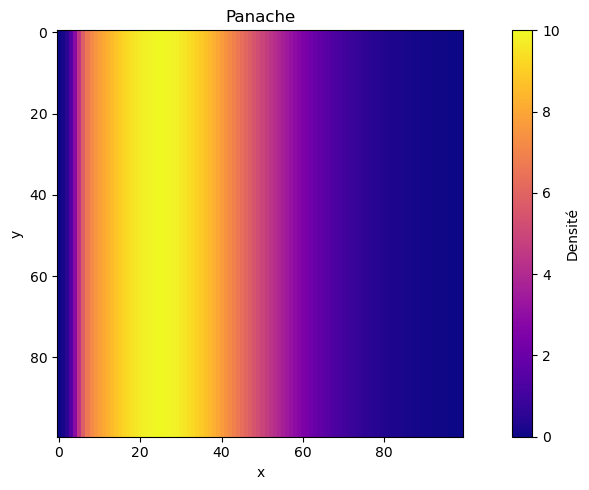

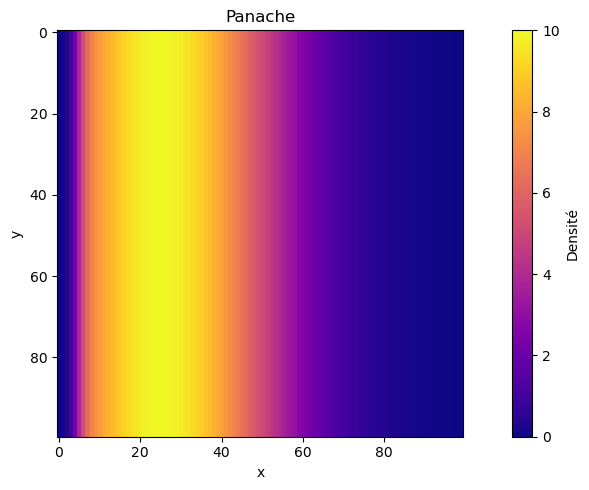

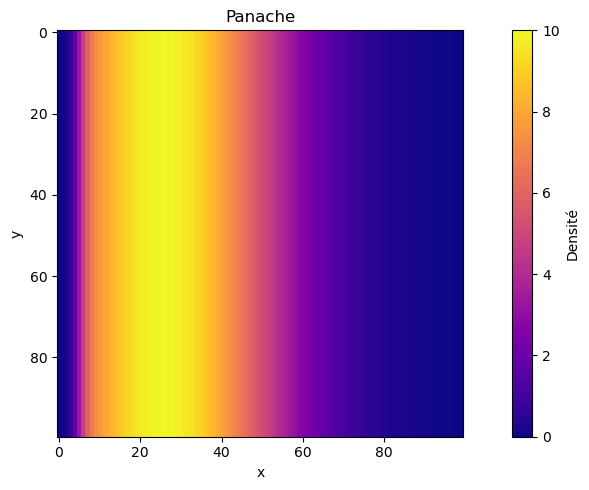

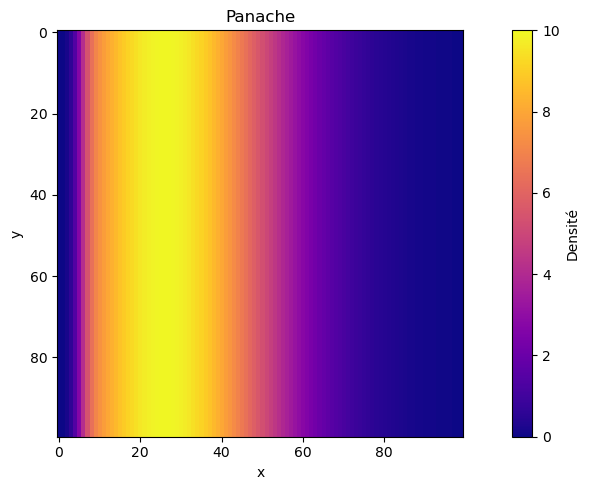

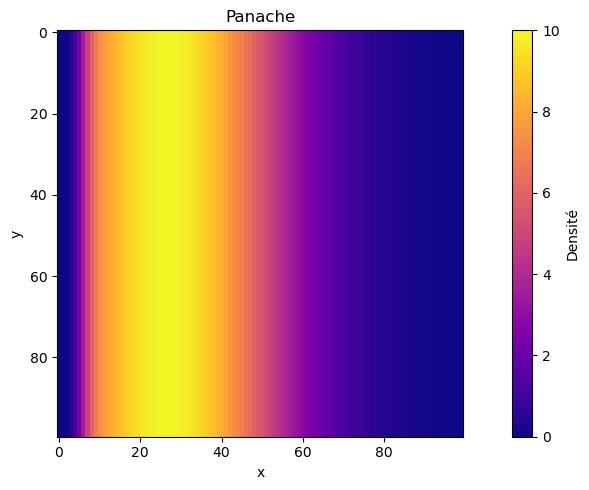

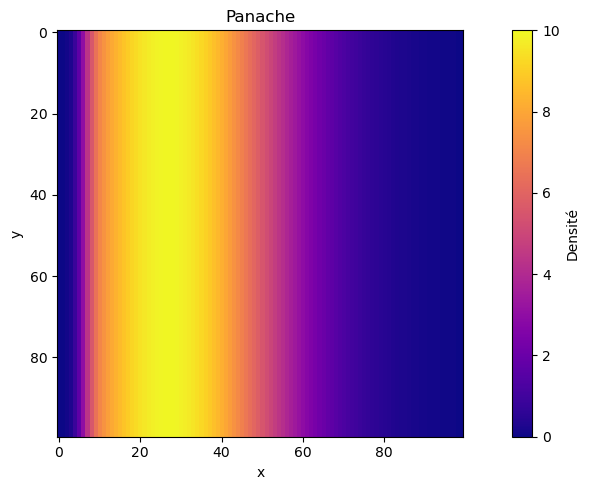

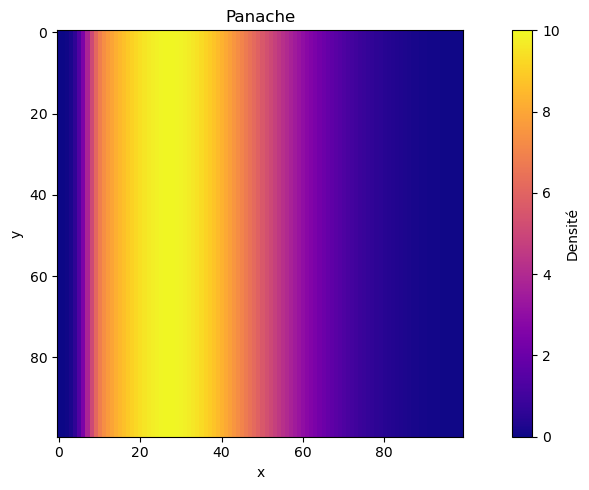

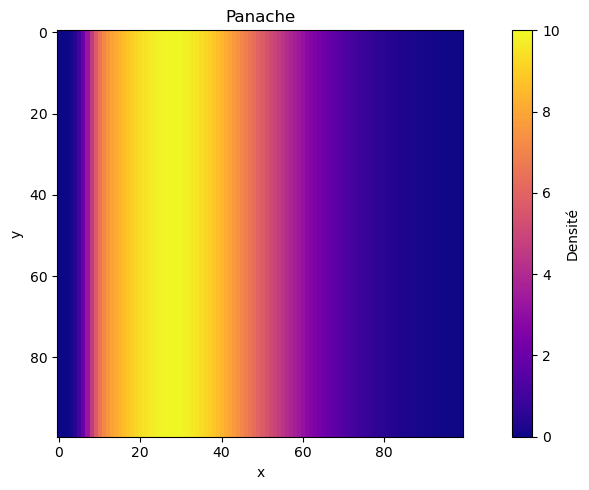

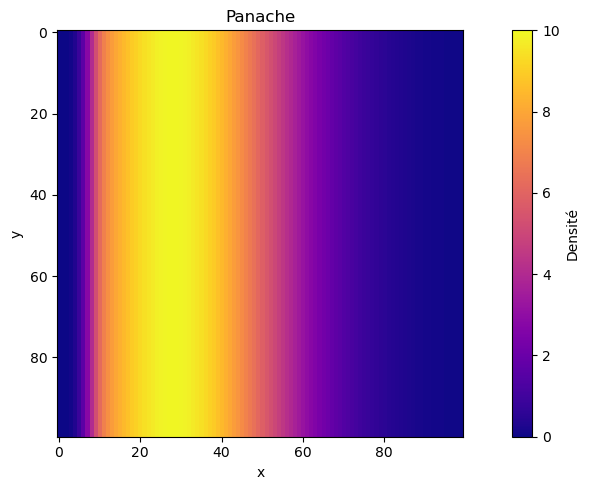

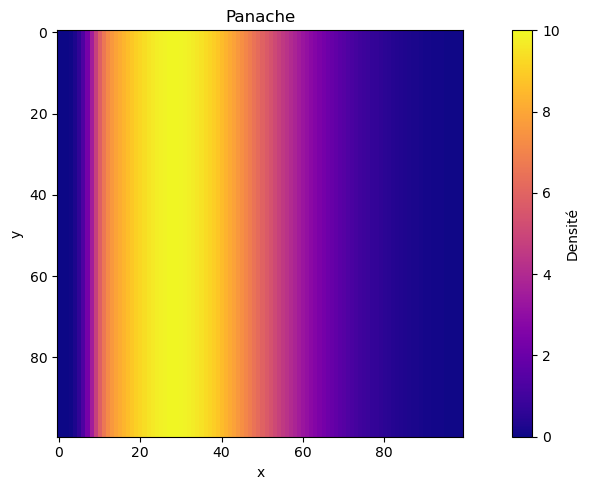

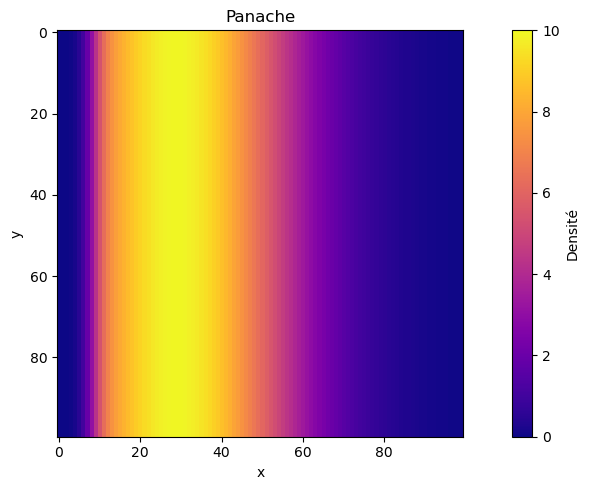

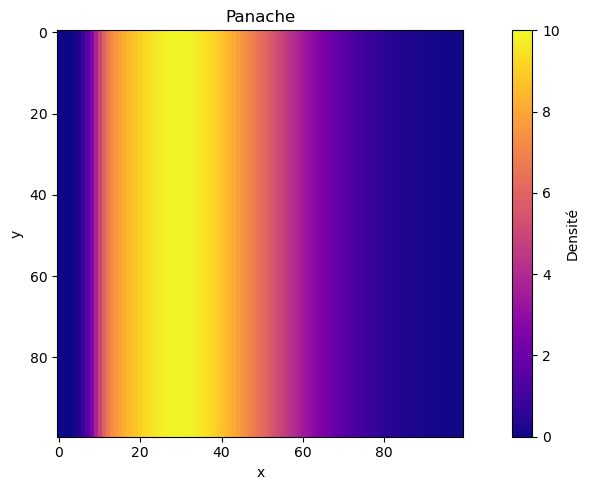

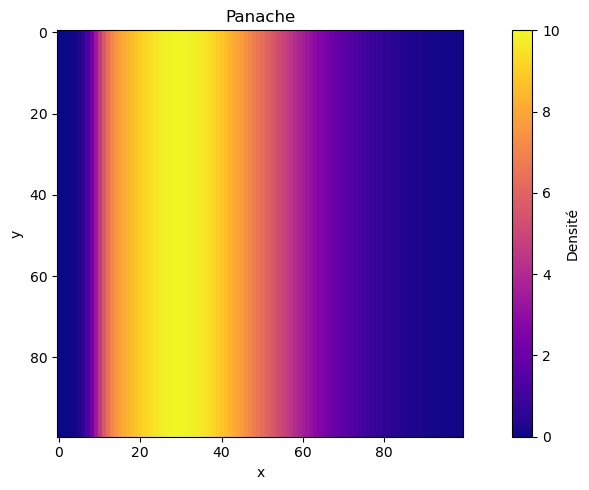

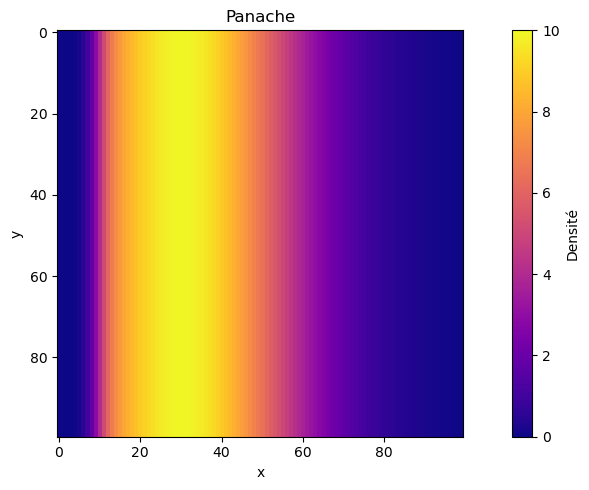

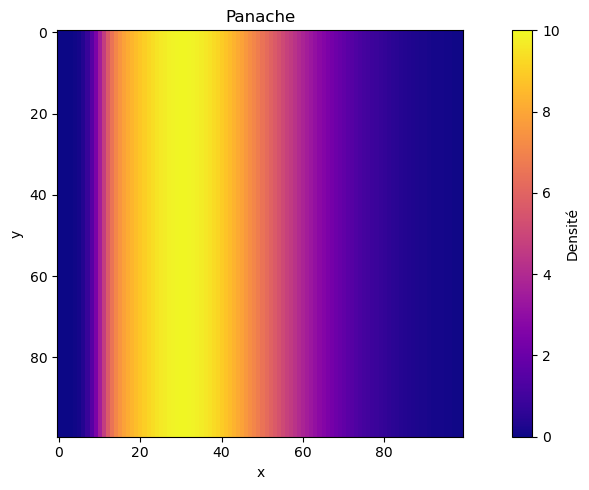

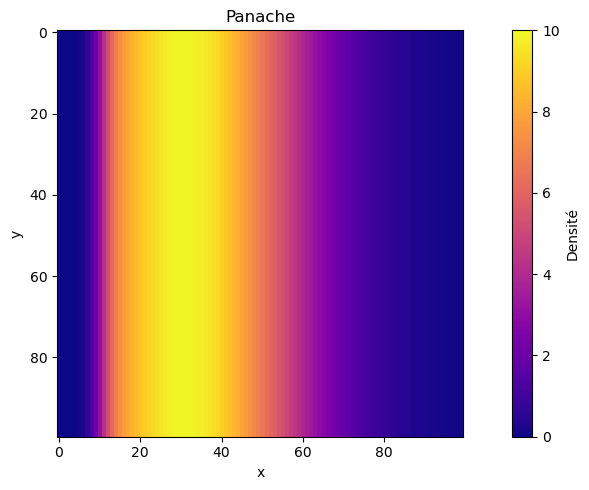

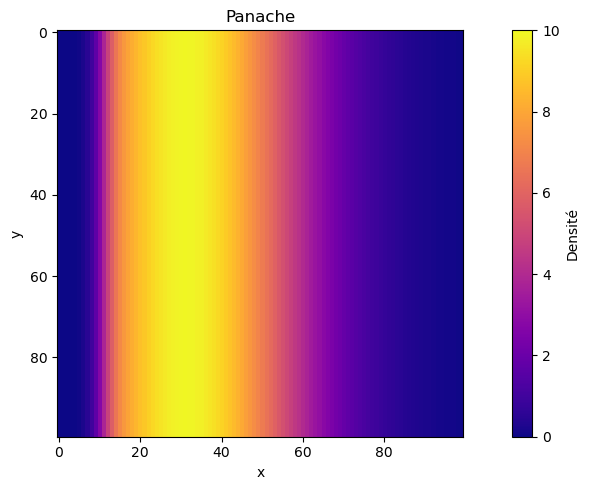

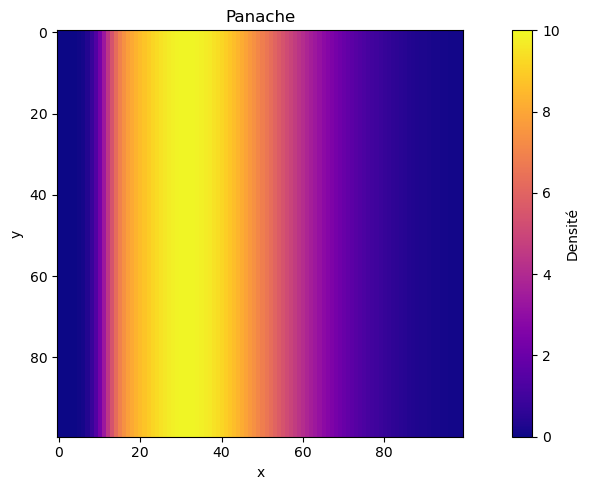

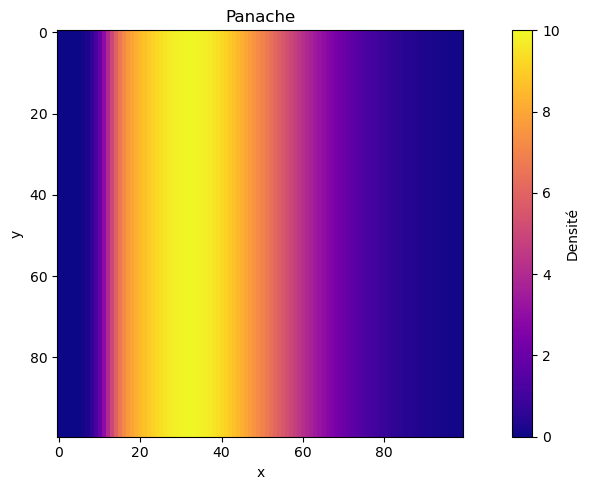

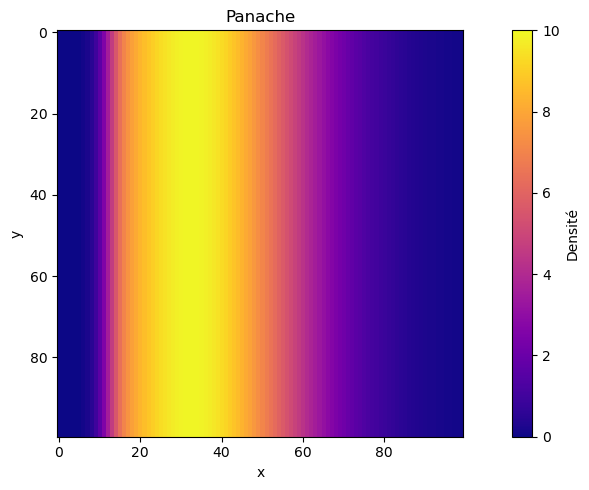

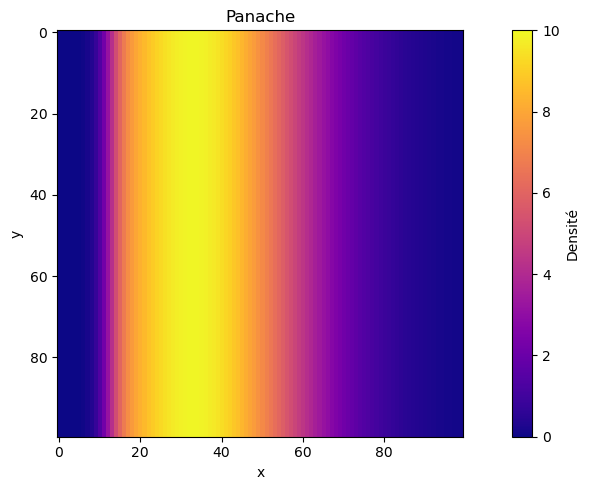

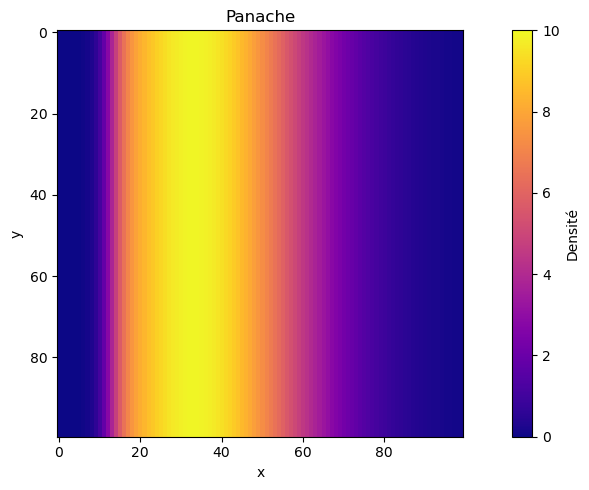

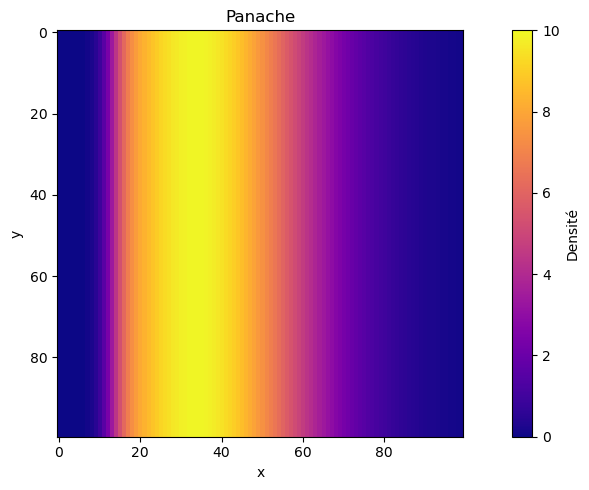

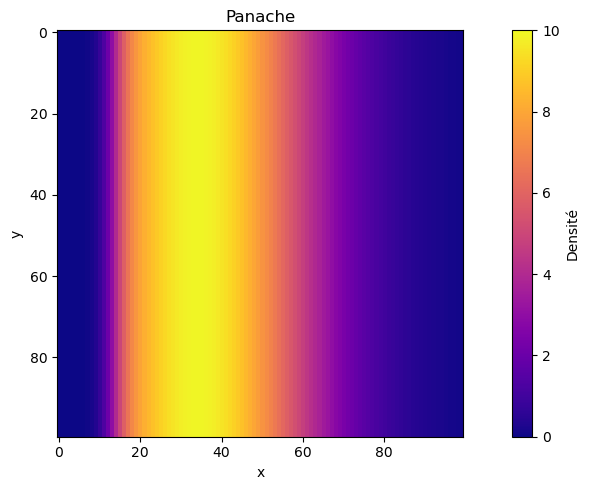

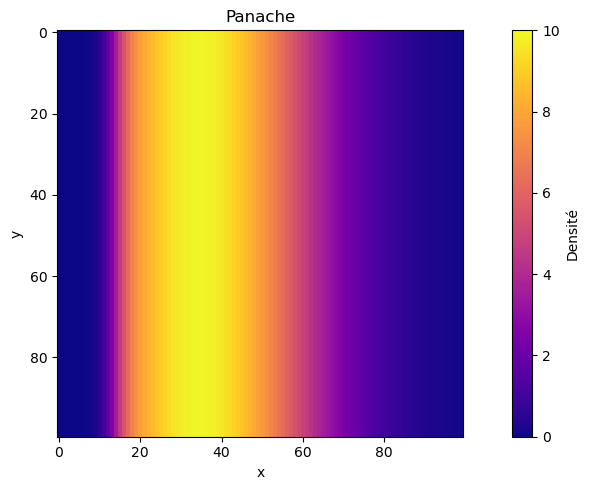

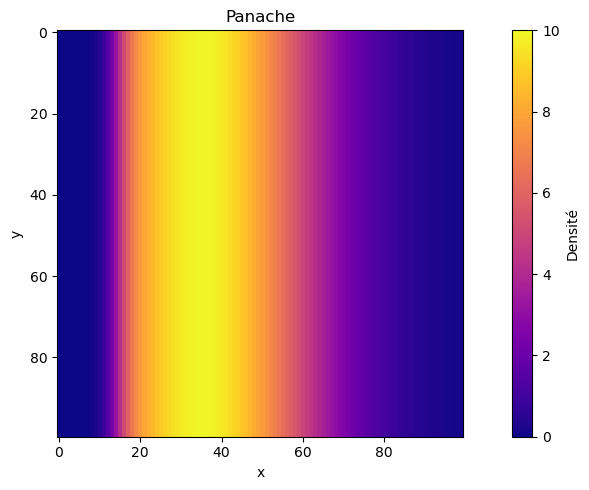

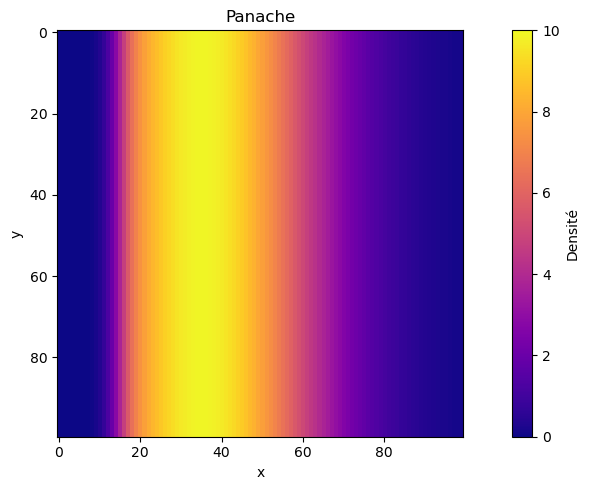

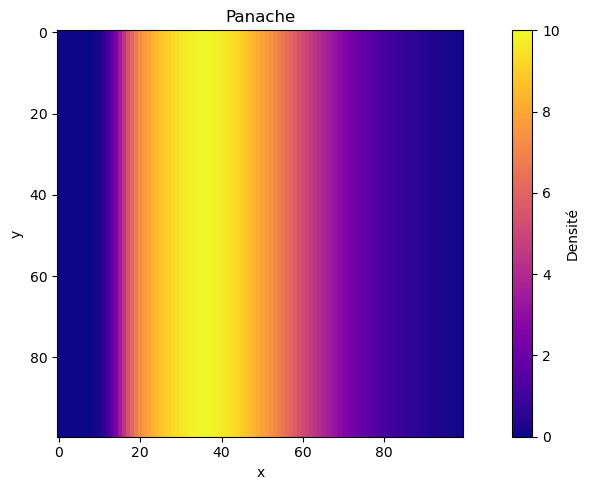

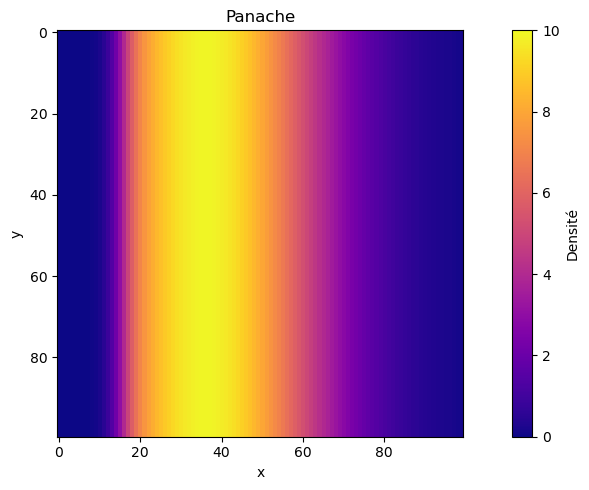

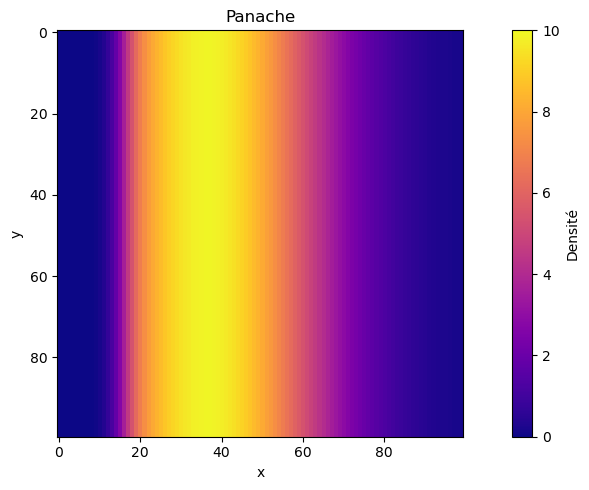

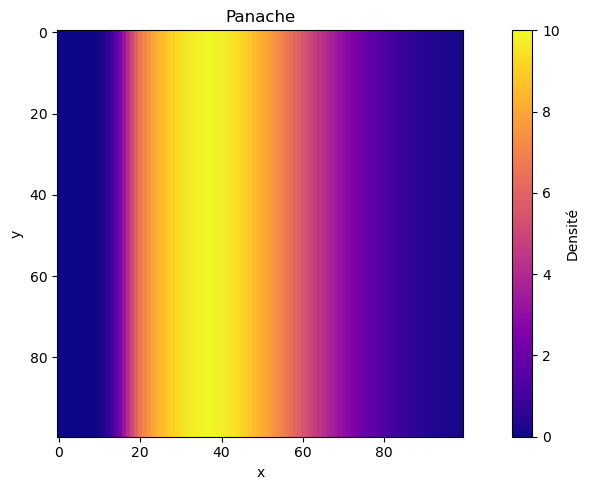

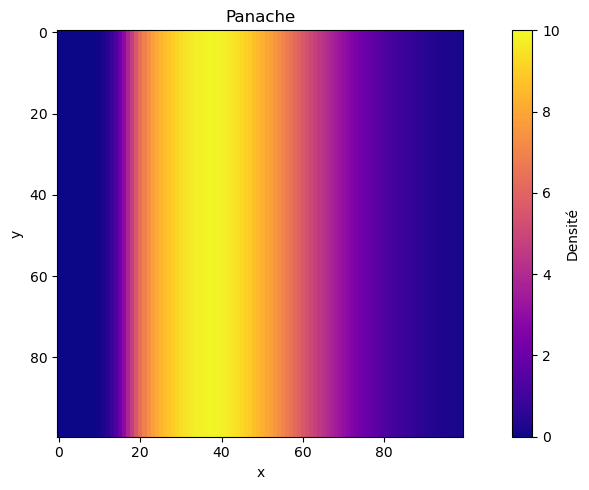

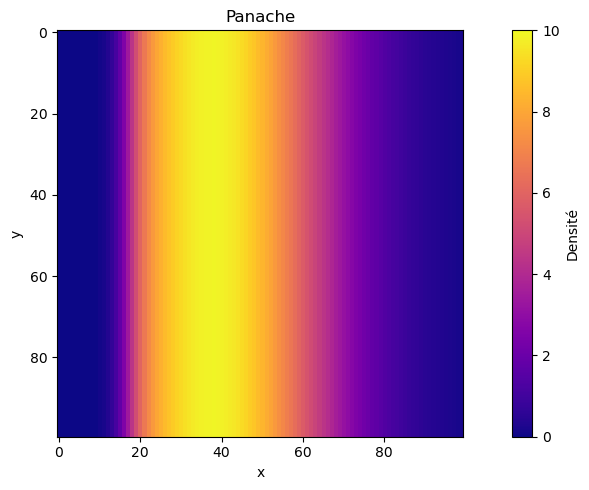

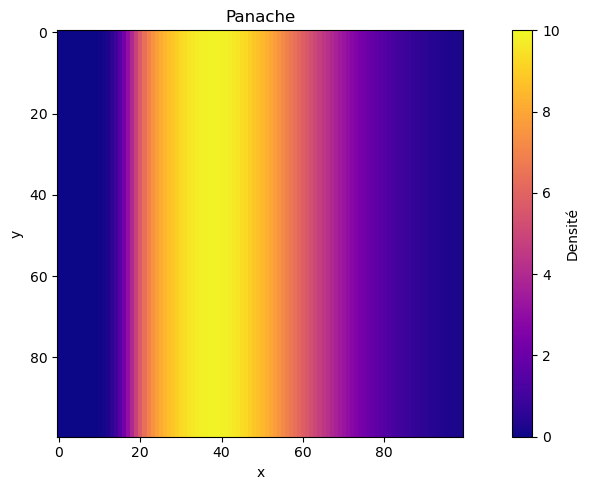

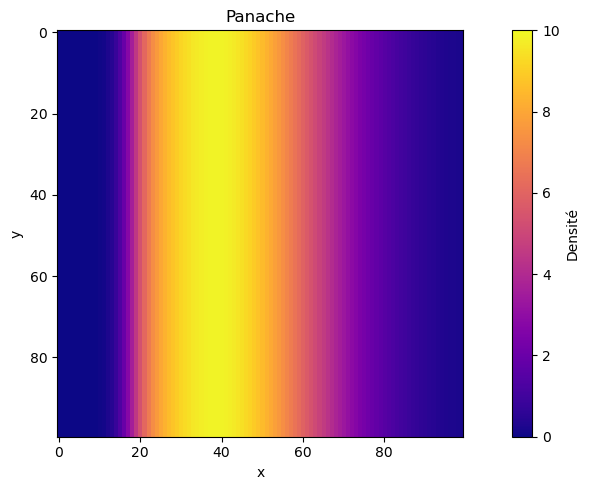

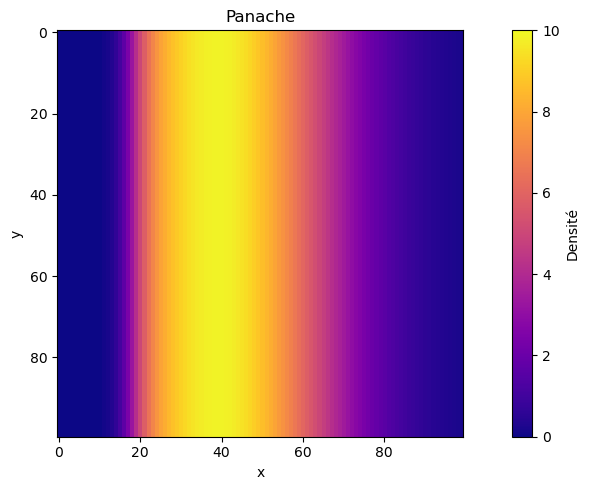

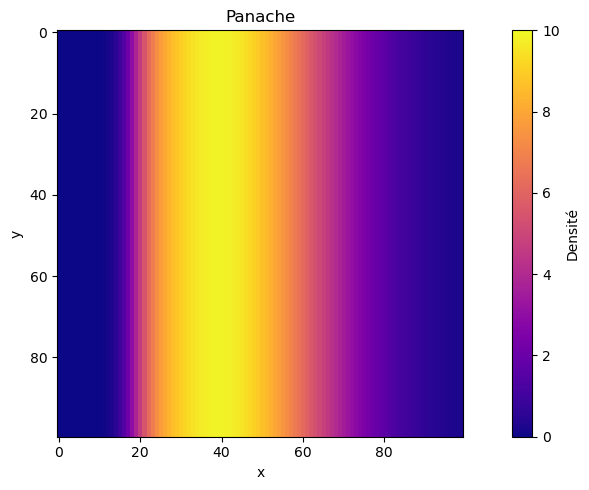

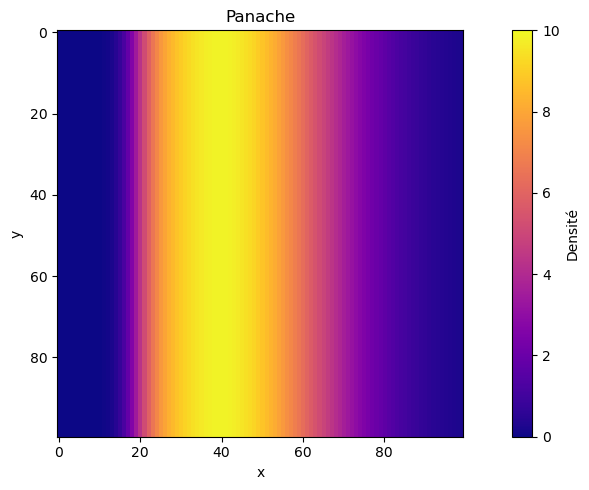

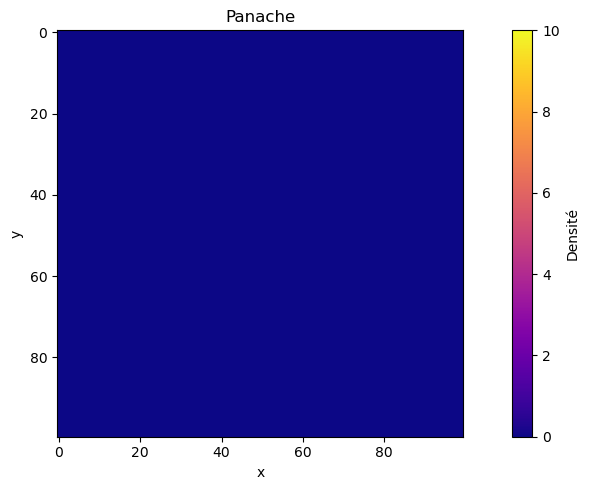

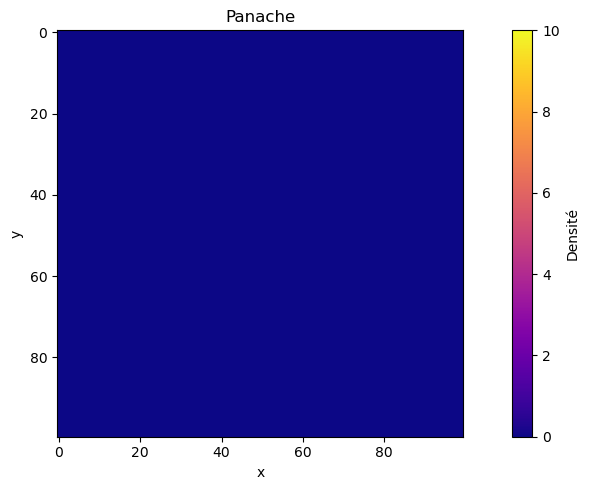

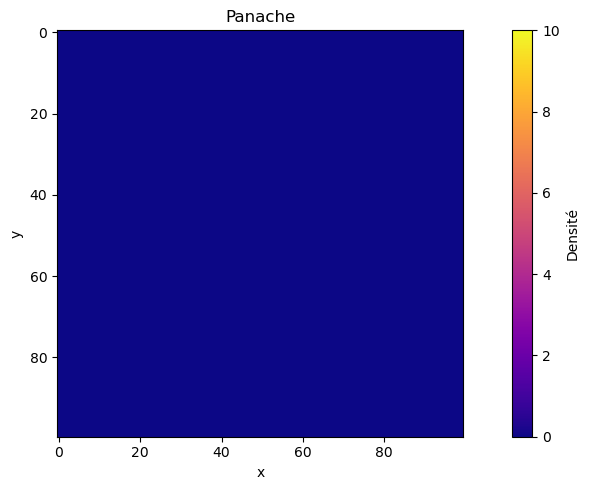

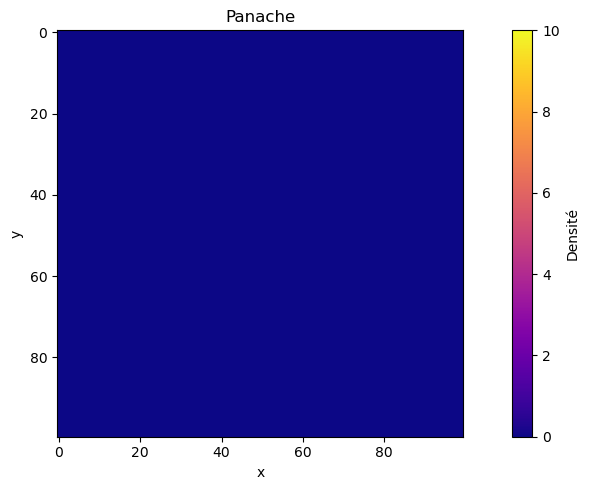

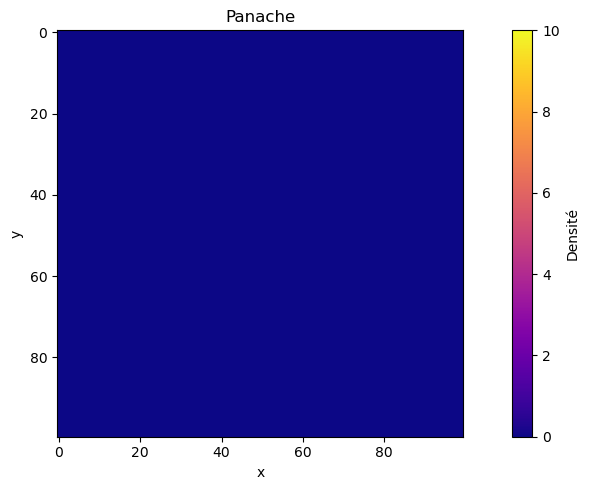

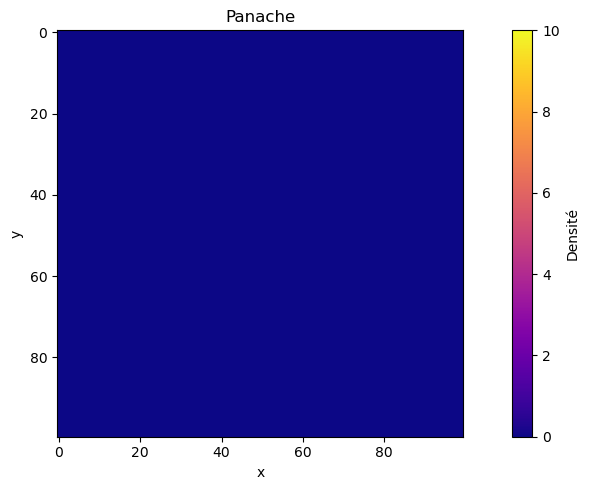

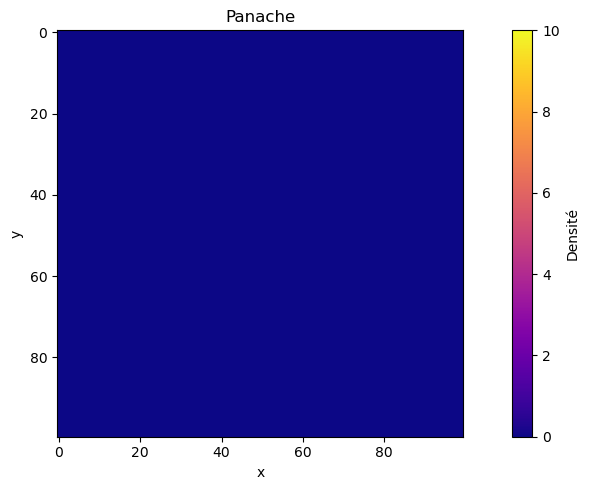

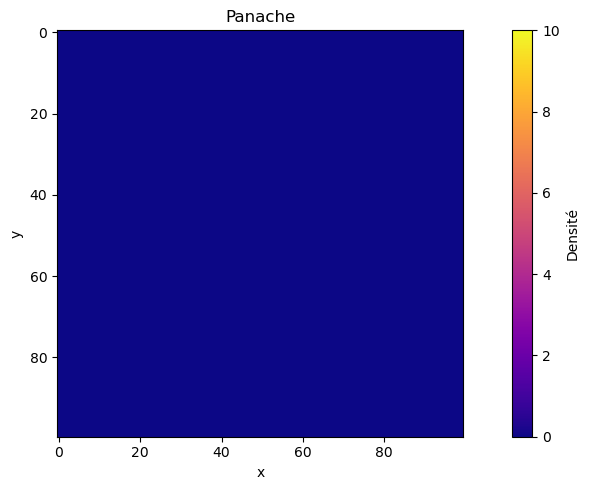

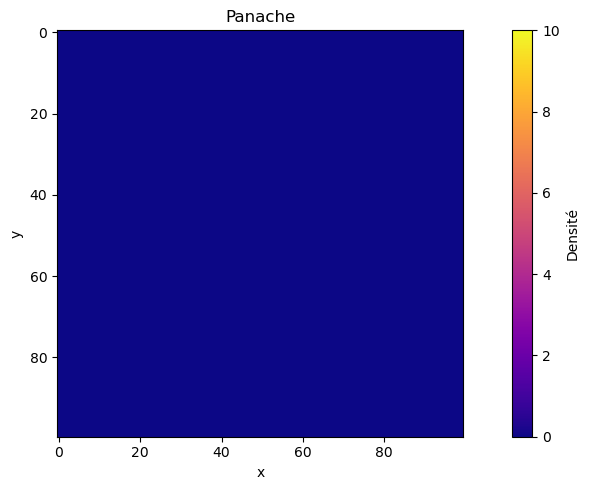

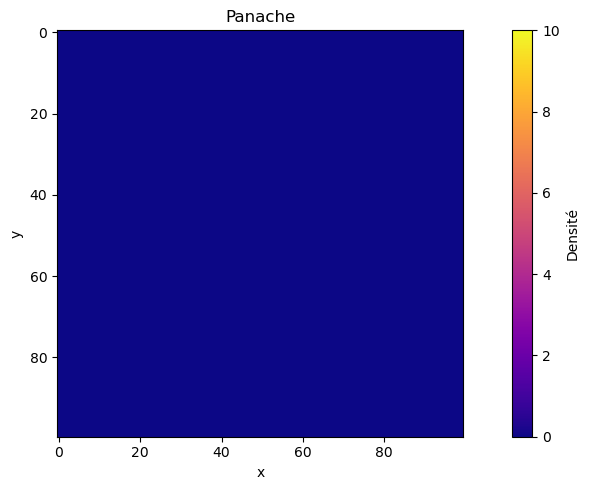

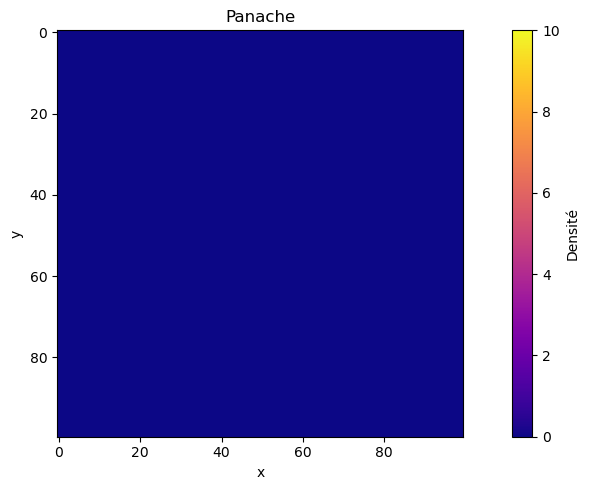

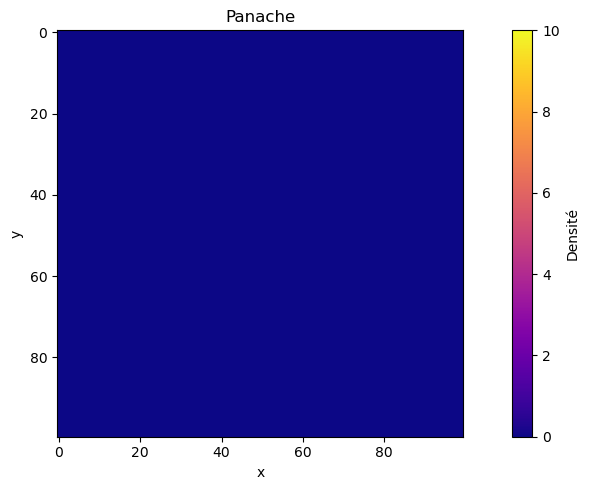

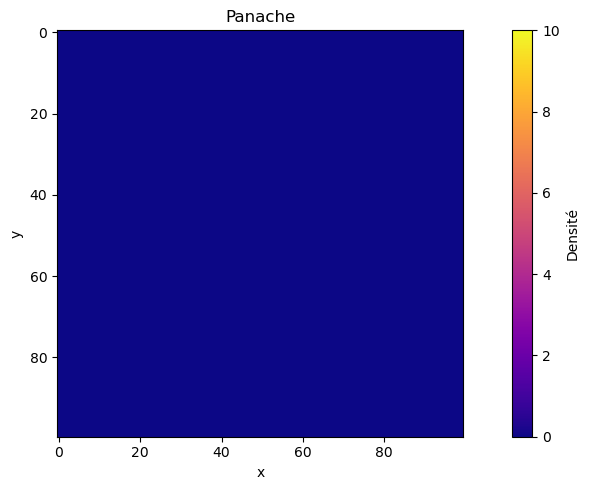

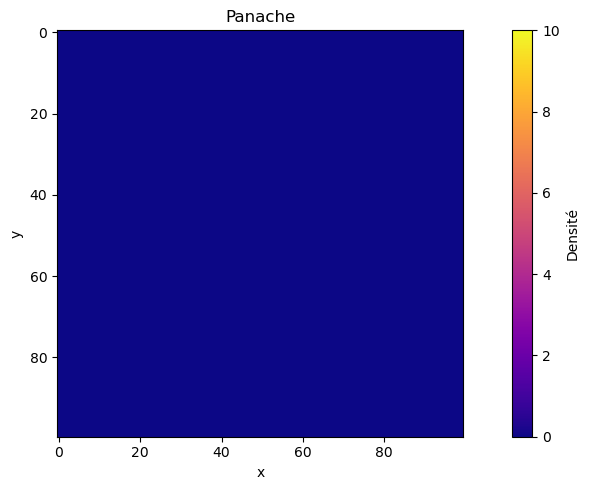

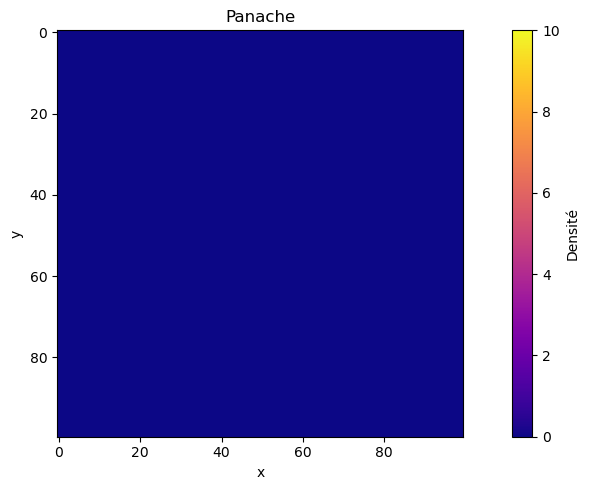

KeyboardInterrupt: 

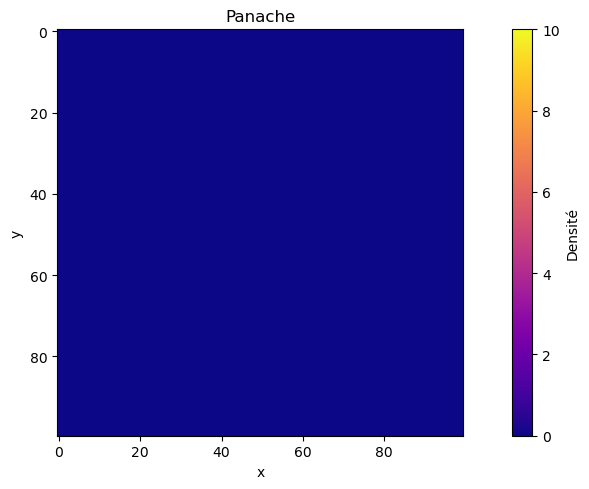

In [24]:
# Propagation en 2D

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
import os
# Longueur L
L = 10

# Vitesse con en metre/
u0 = 1/25
# Con
q0 = 10
def f(x,t):
    x0 = L/5
    sigmax = L/15
    sigmay = L/15
    return  q0*np.exp(-((x-(x0+u0*t))/2*sigmax)**2)

def init_panache(dim):
    mat = np.zeros((dim,dim))
    for i in range (dim):
        for j in range (dim):
            mat[i][j] = f(L*j/dim,0)

        
    return mat
    

def avancement(dim):
    panache_0 = init_panache(dim)
    panache = np.zeros((dim,dim,dim))
    panache[0] = panache_0
    a = (u0*dim/L)

    for t in range (1,50):
        for i in range (dim):
            for j in range (dim):
                if j == 0:
                    panache[t][i][j] =  (-a + 1)*panache[t-1][i][j]
                else:
                    panache[t][i][j] =  (-a + 1)*panache[t-1][i][j] + a * panache[t-1][i][j-1] 

    for i in range(1, 100):
        plt.rcParams["figure.figsize"] = [10, 5]
        plt.rcParams["figure.autolayout"] = True
        plt.imshow(panache[i], cmap="plasma")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar(label='Densité')
        plt.clim(0,10)            
        plt.title('Panache')
        plt.savefig(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_cheminé/panache_{i}.png', dpi=500)
        plt.show()
        plt.close

avancement(100)

liste_fichier = []
liste_fichier = os.listdir("C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_gaussienne")
#print(liste_fichier)
liste_panache = []
for i in range(1, 100):
    im = Image.open(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_gaussienne/panache_{i}.png')
    new_im = im.resize((500, 500))
    liste_panache.append(Image.open(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_gaussienne/panache_{i}.png'))

liste_panache[0].save('C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_gaussienne/panache_gaussienne.gif', save_all = True, append_images = liste_panache[1:], optimize = False, duration = 50)

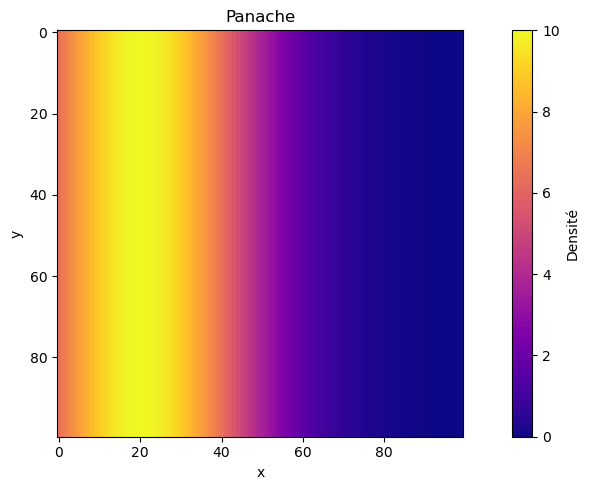

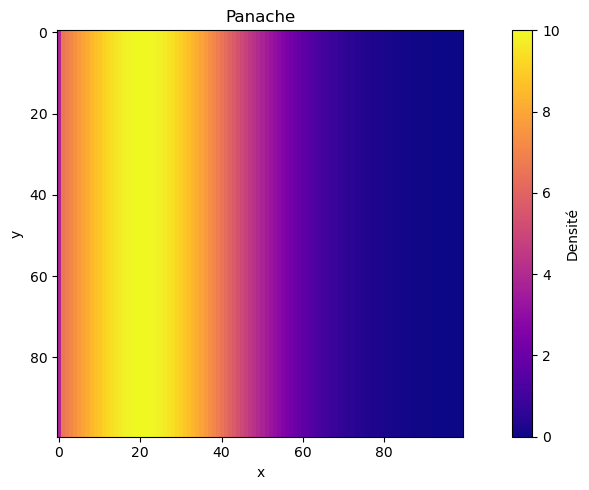

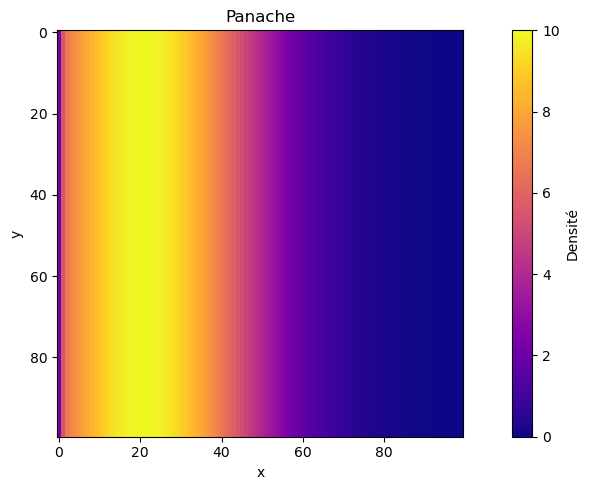

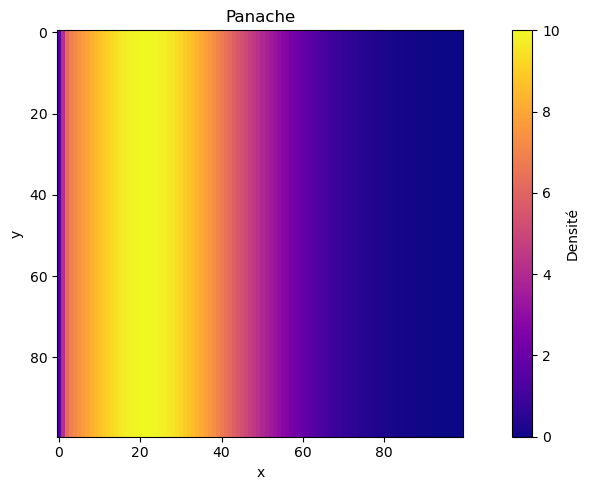

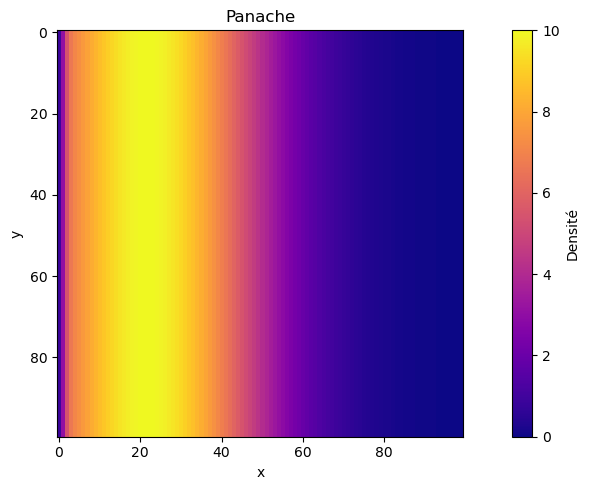

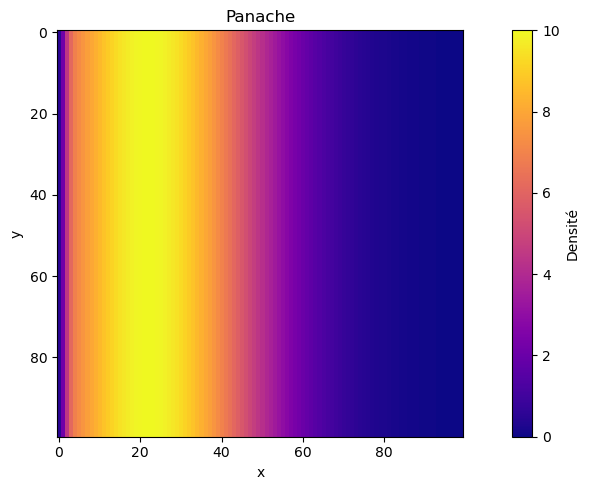

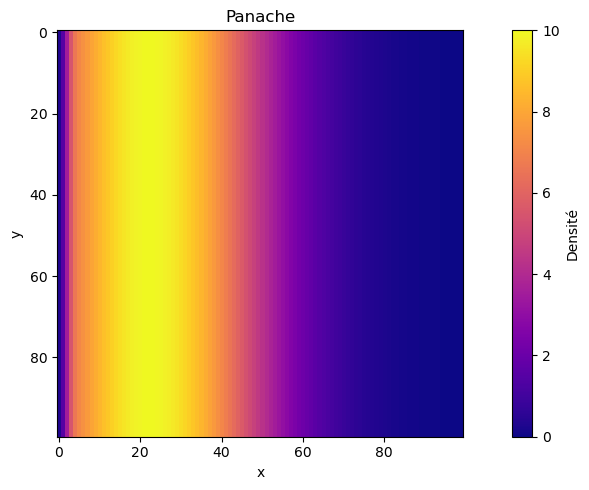

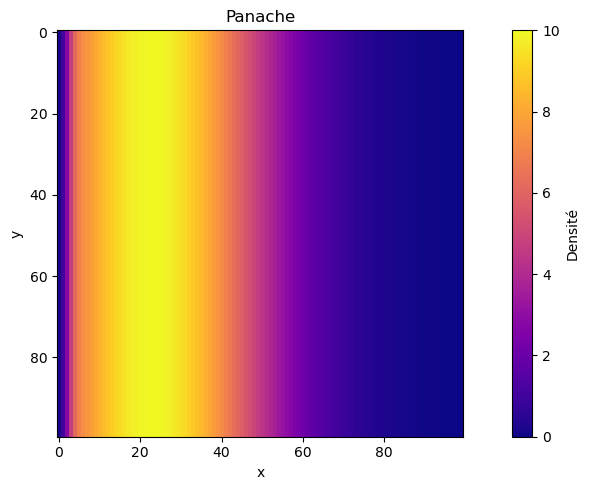

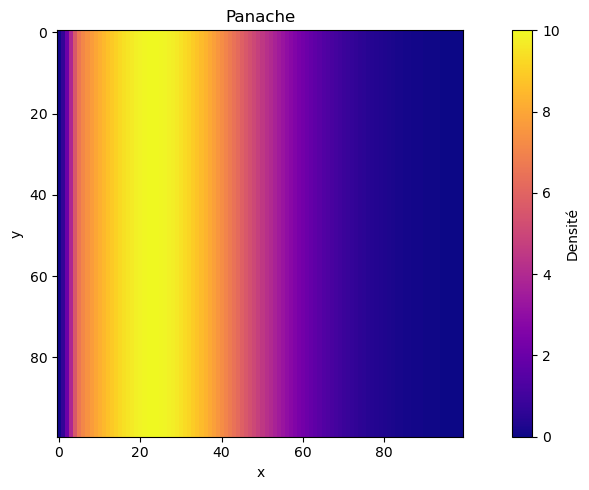

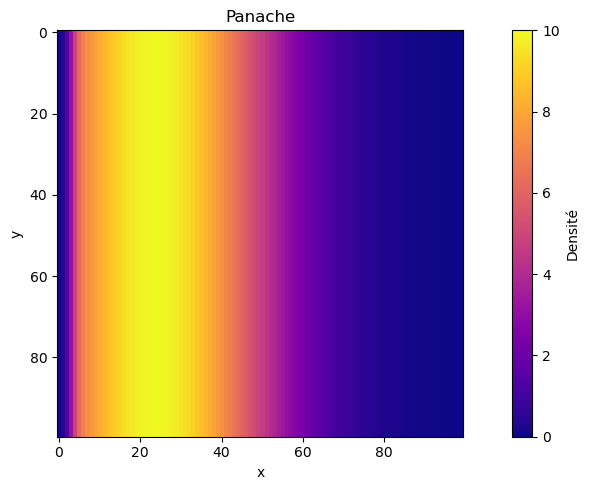

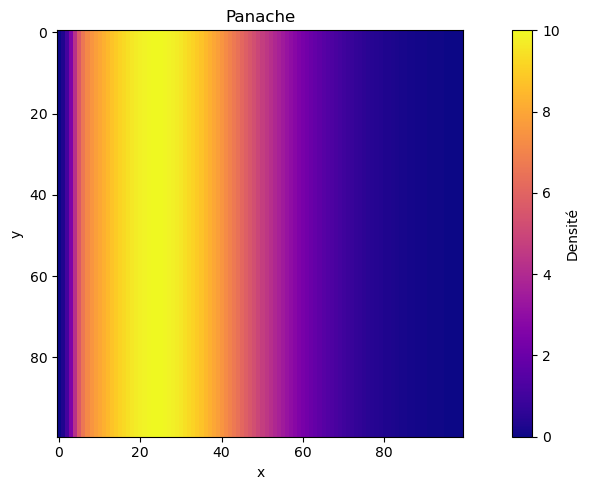

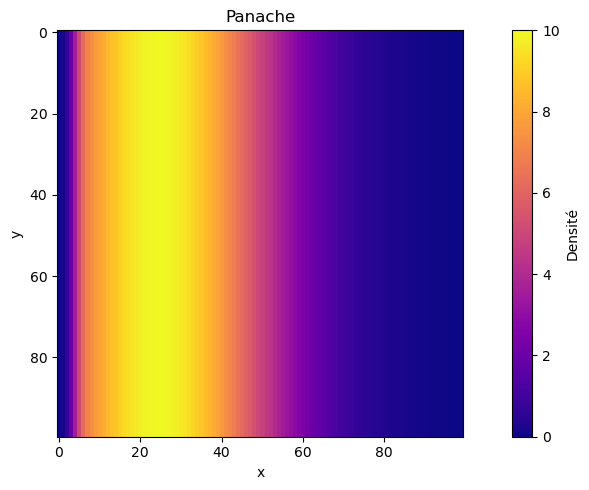

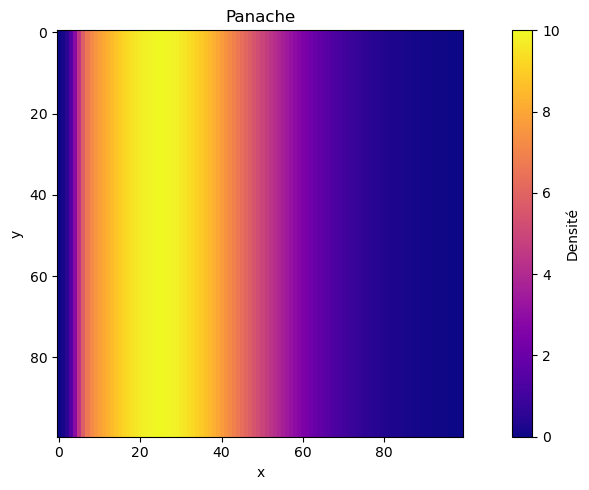

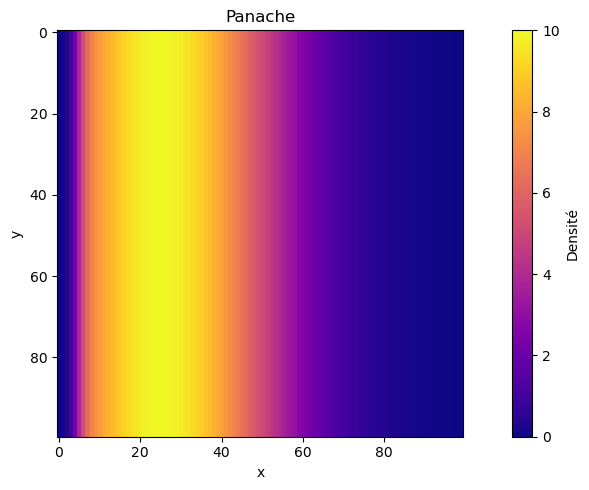

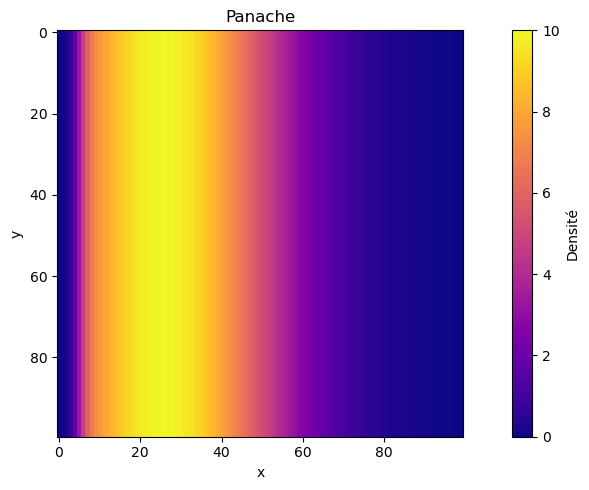

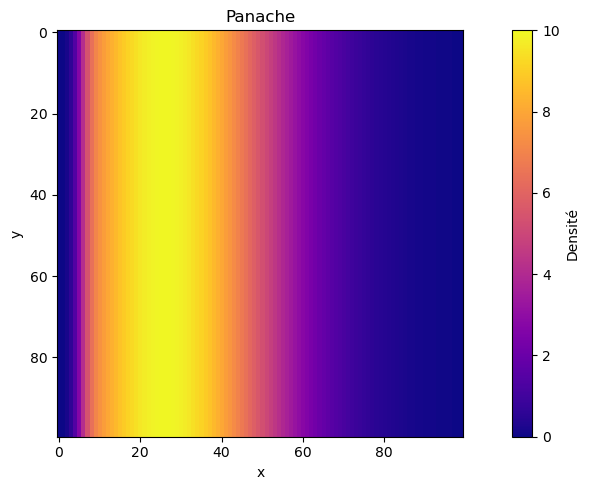

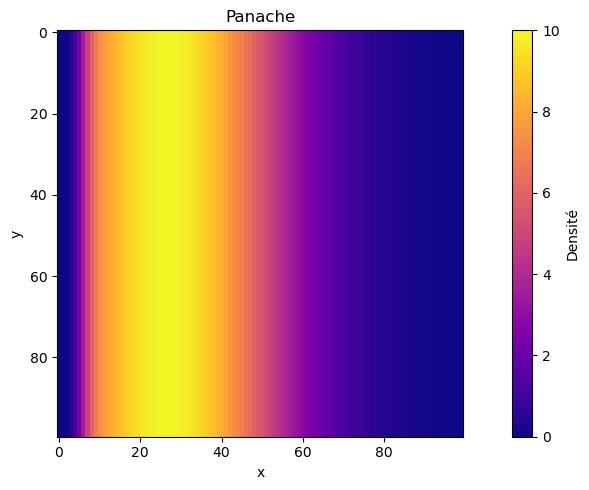

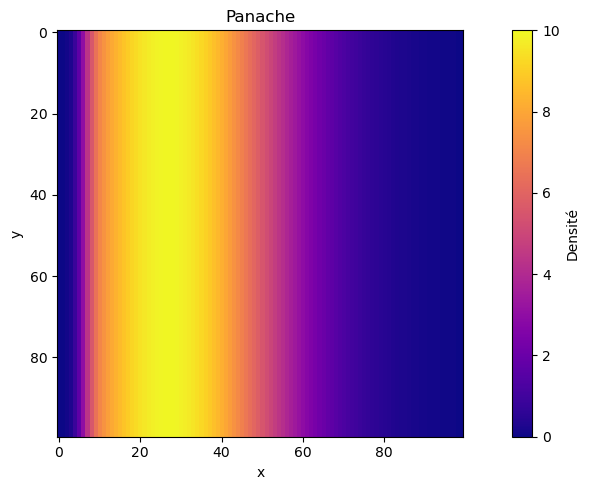

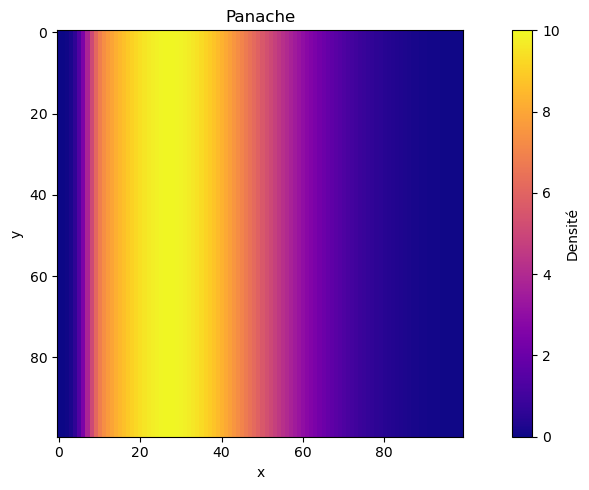

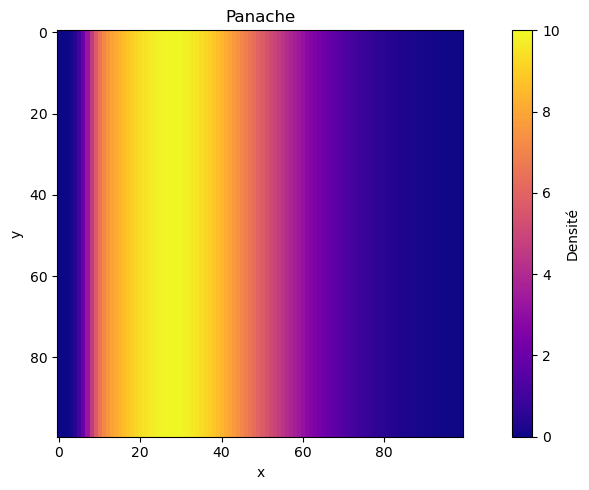

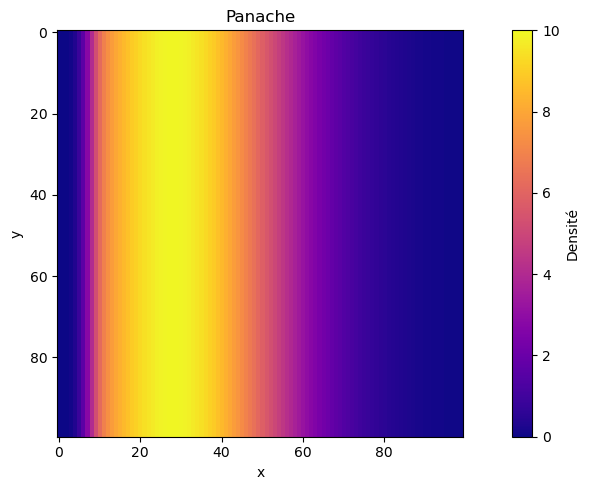

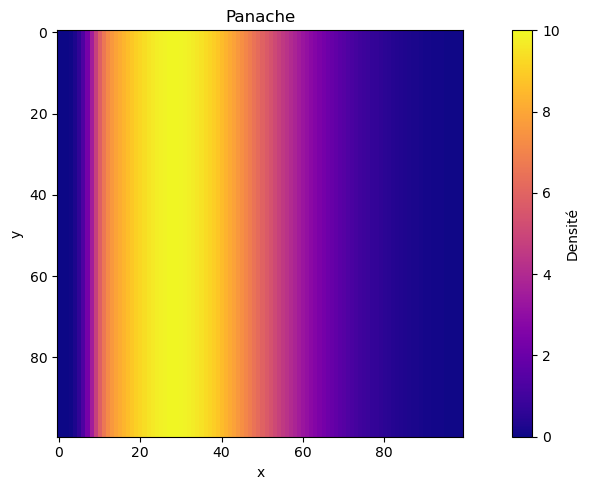

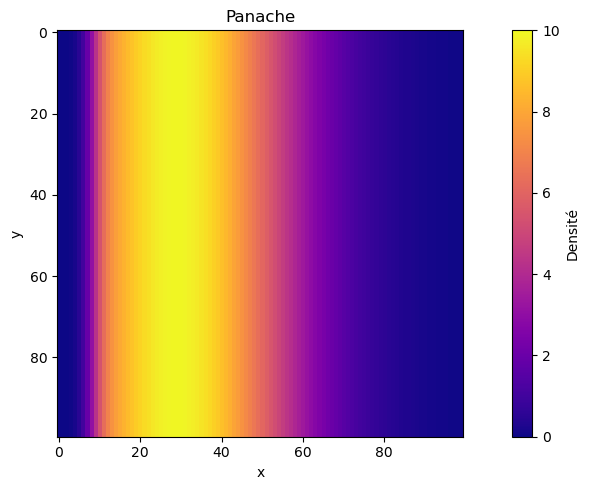

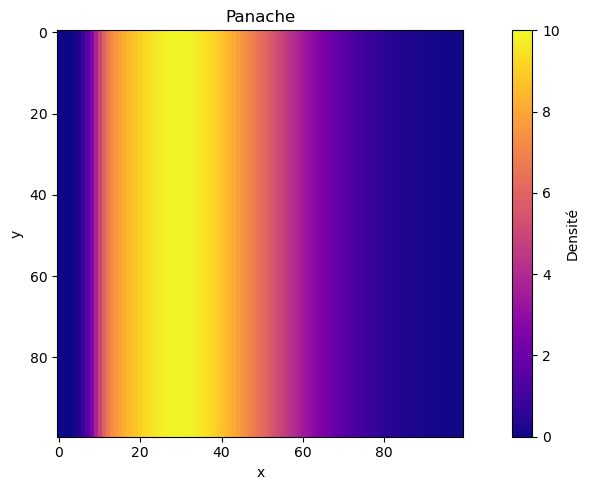

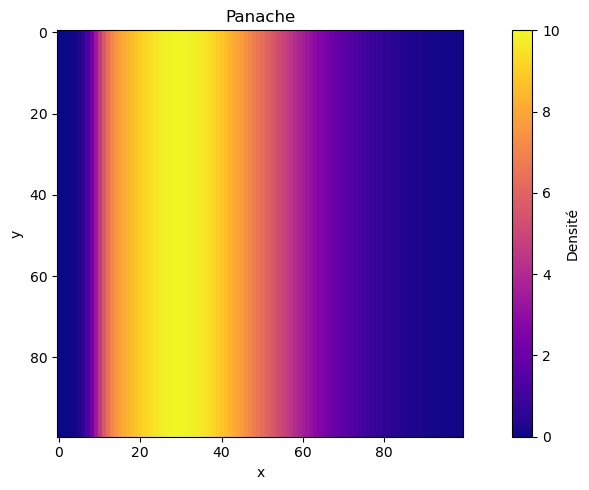

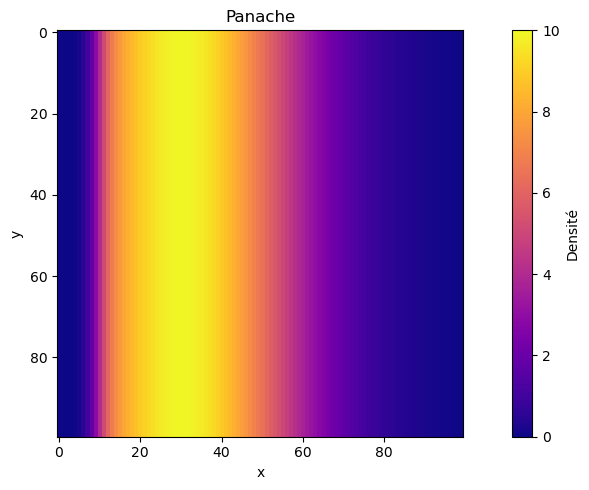

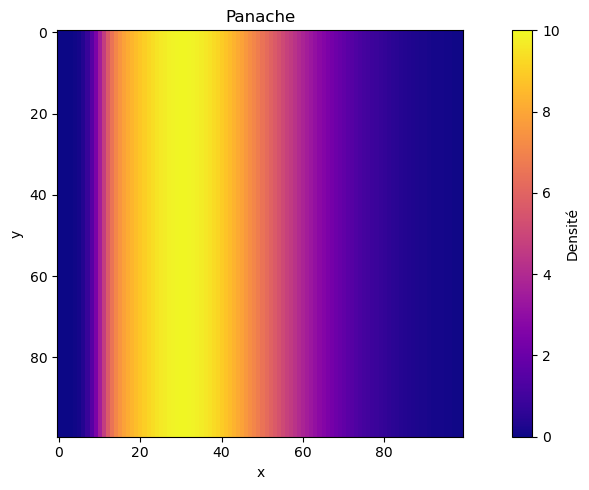

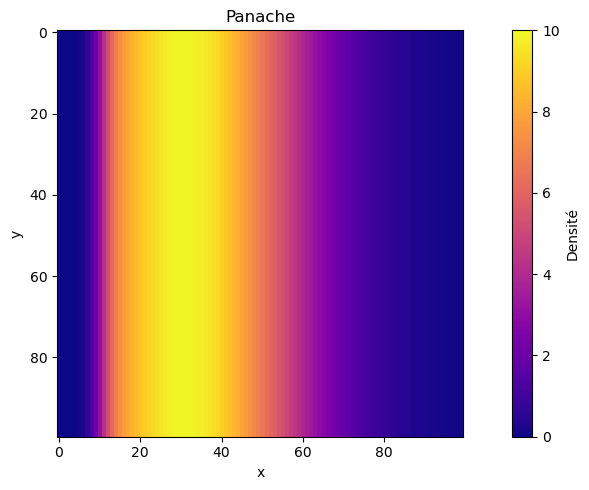

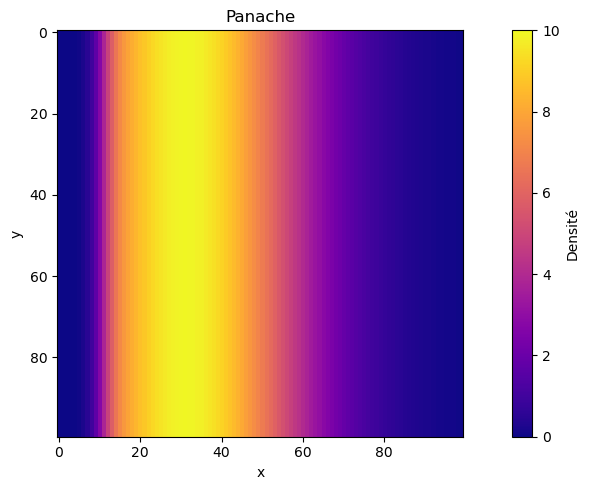

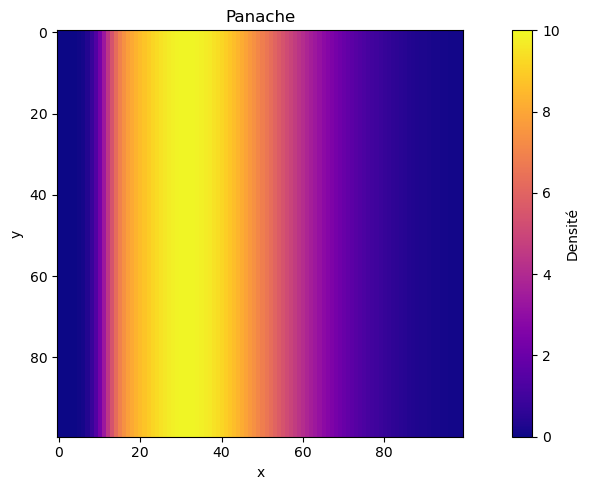

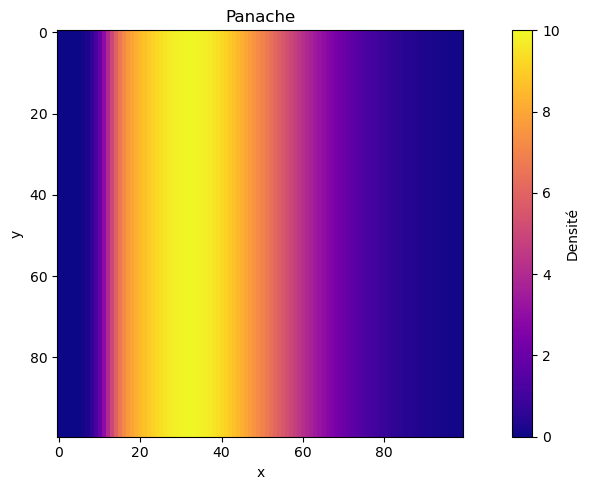

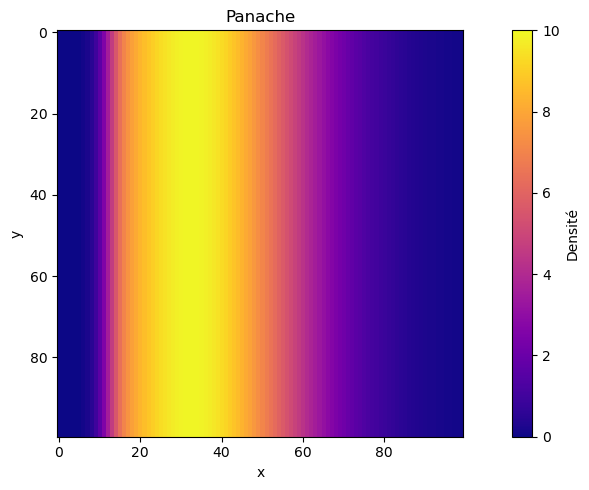

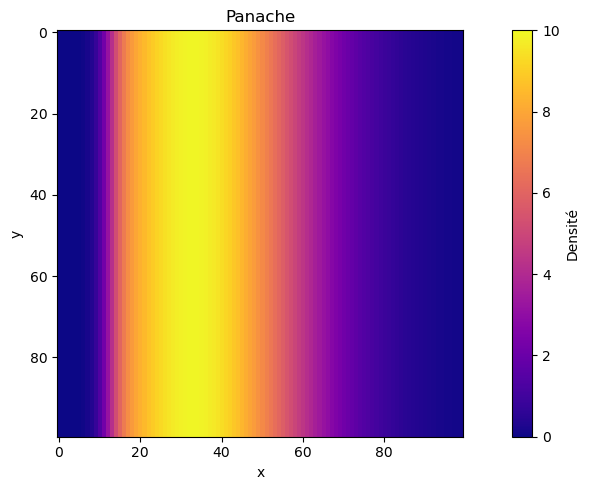

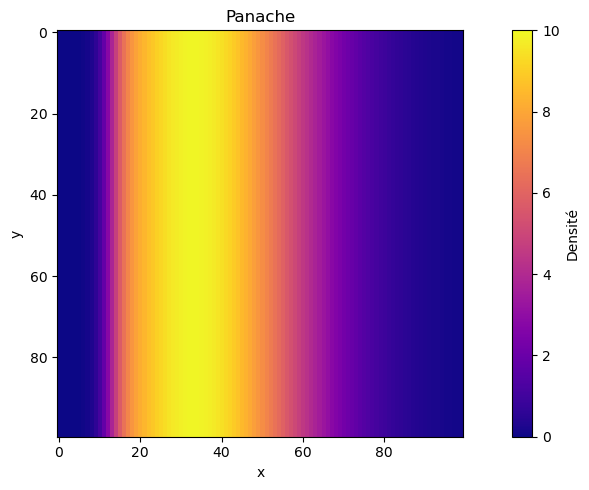

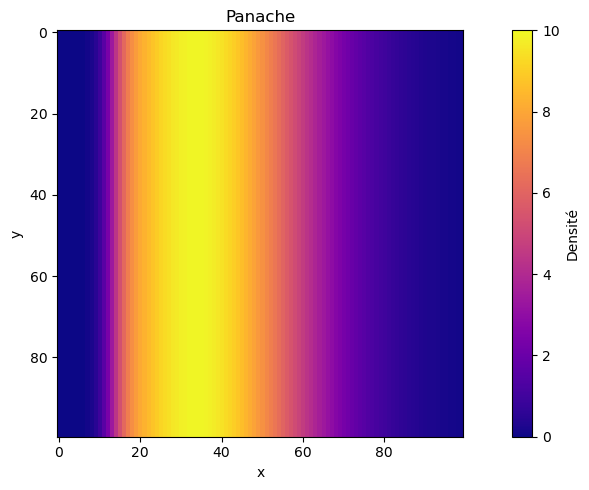

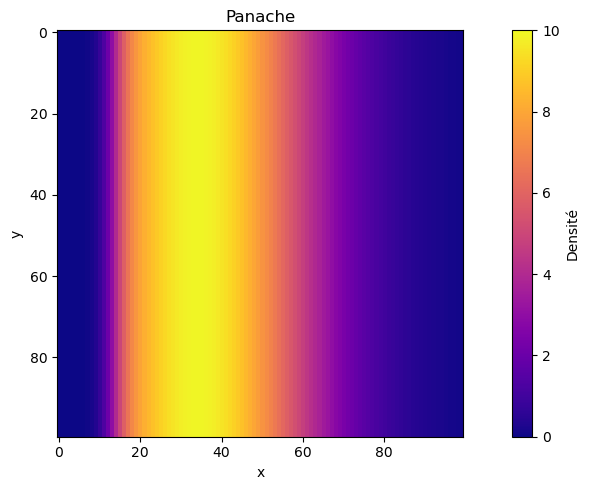

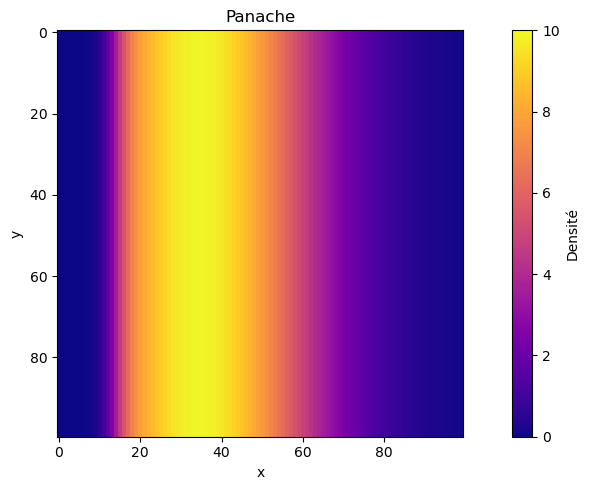

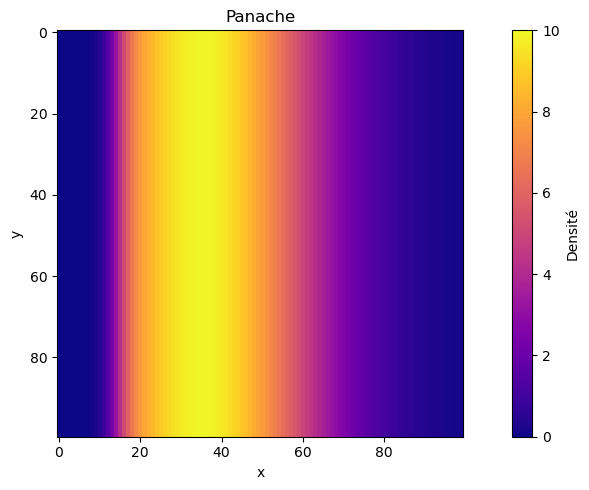

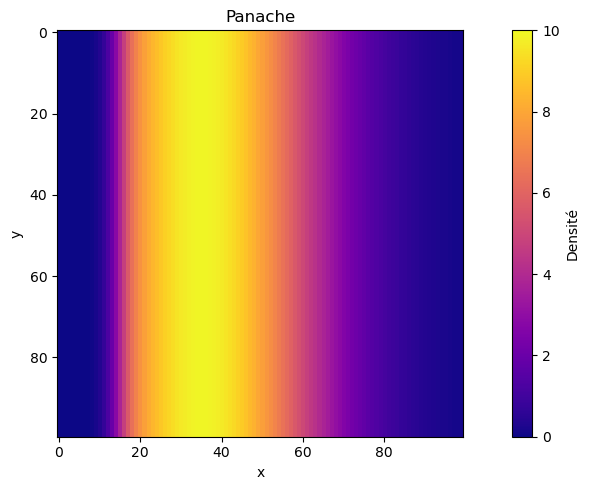

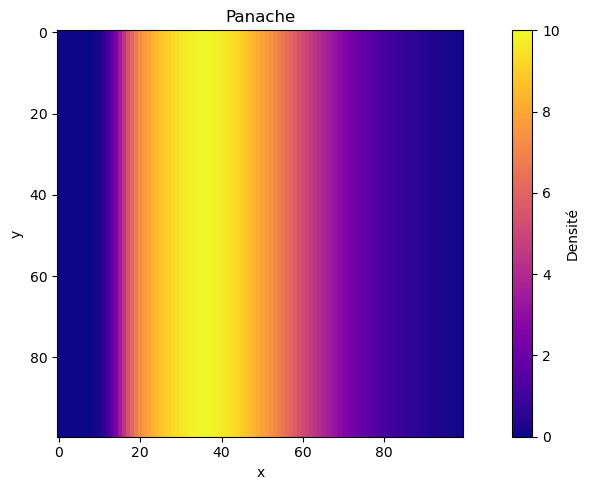

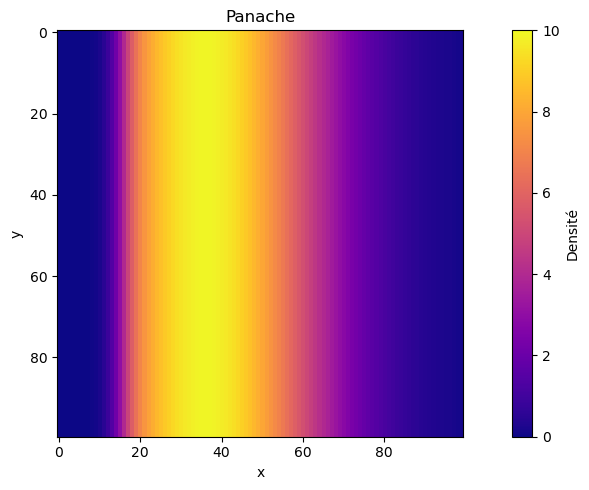

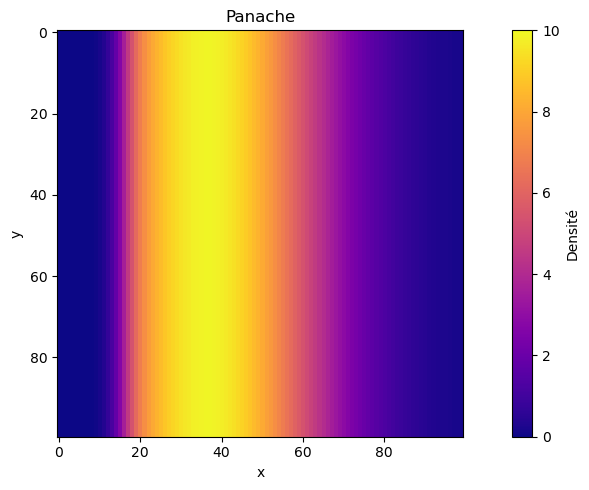

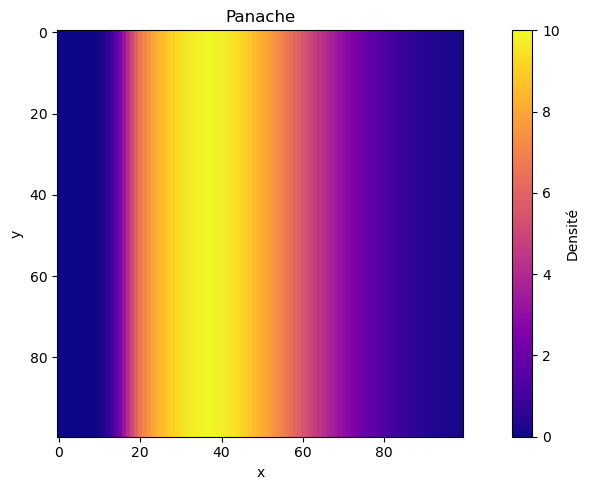

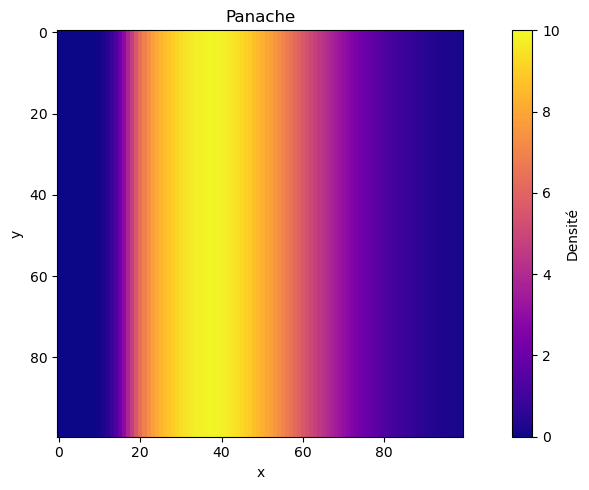

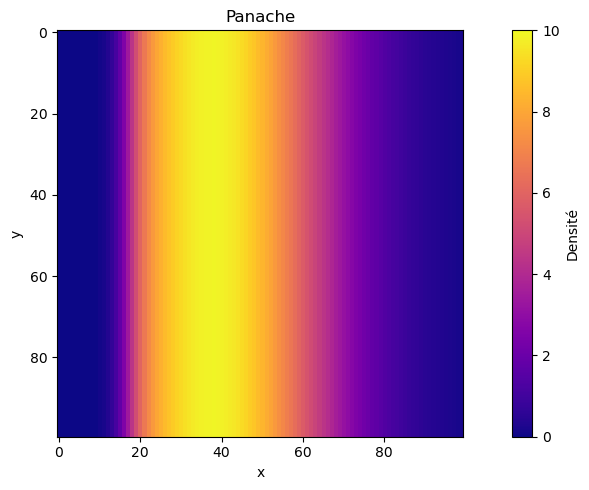

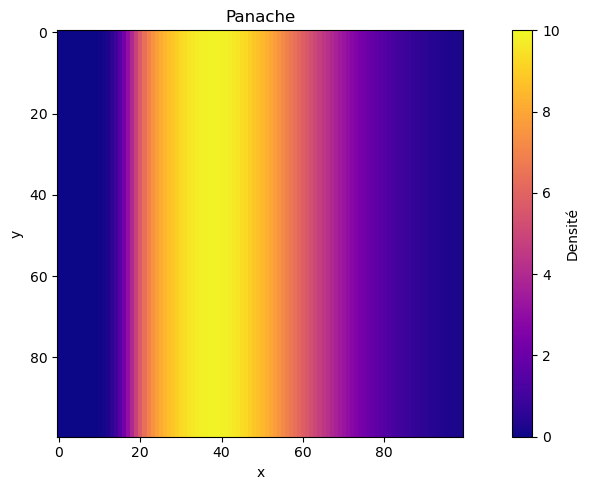

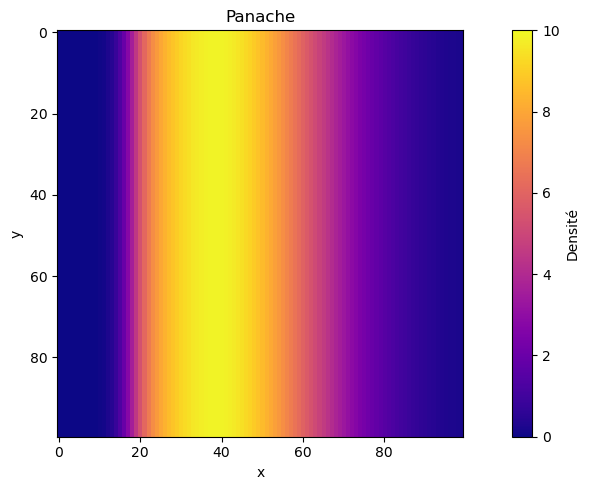

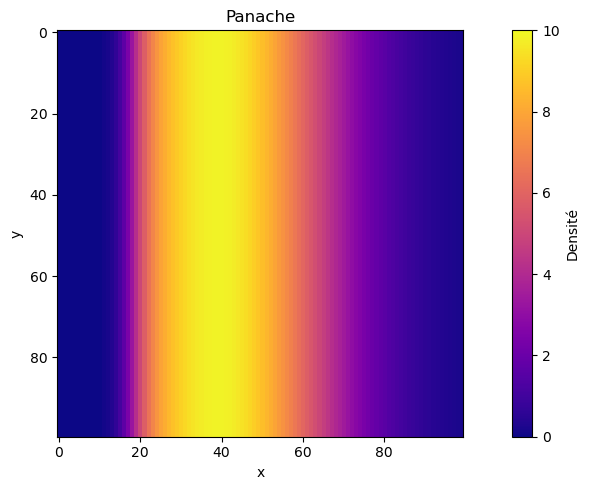

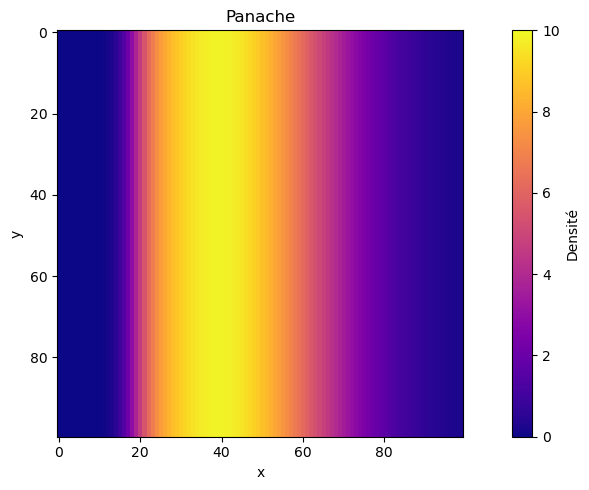

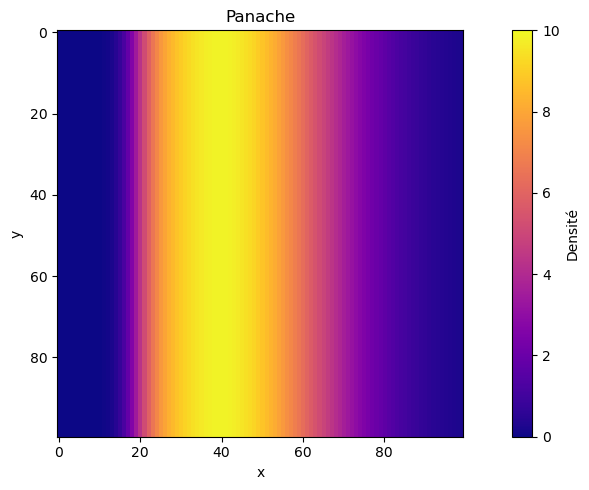

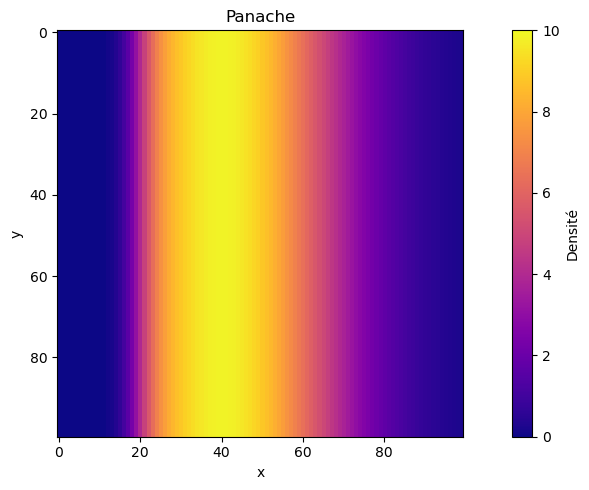

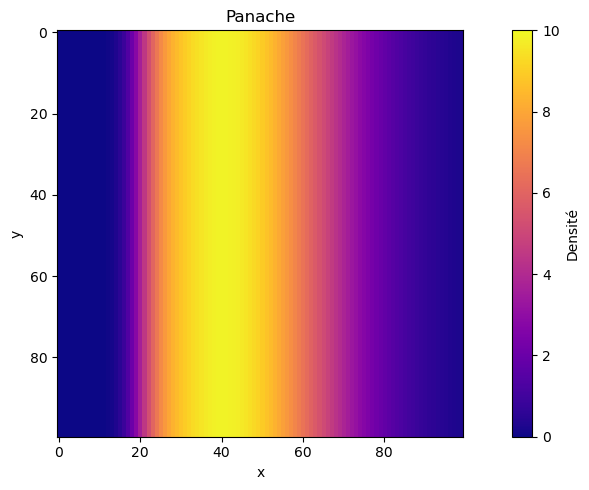

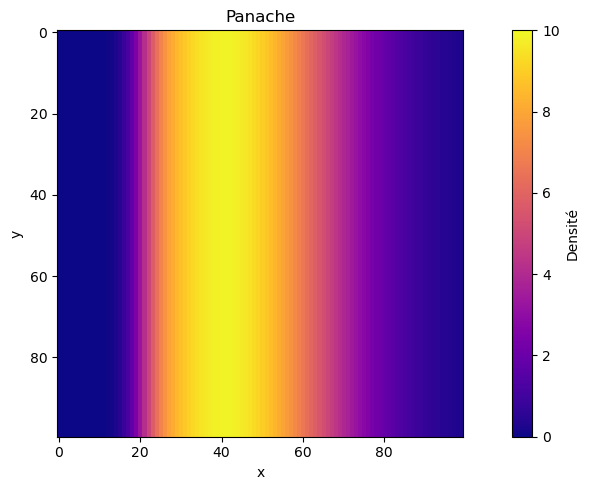

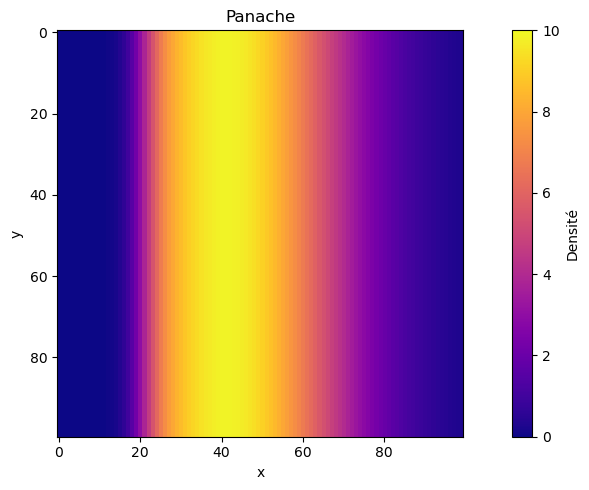

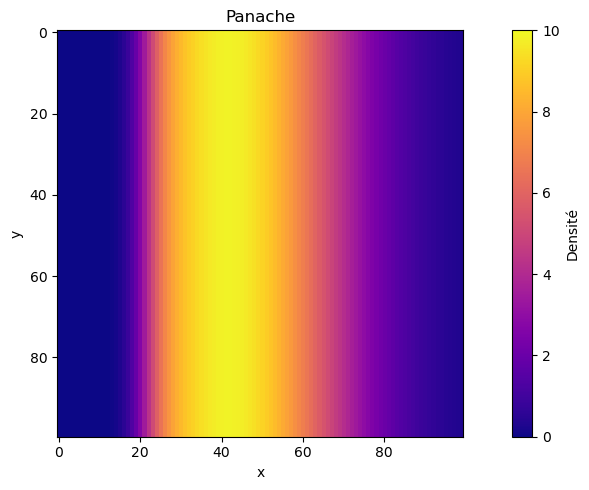

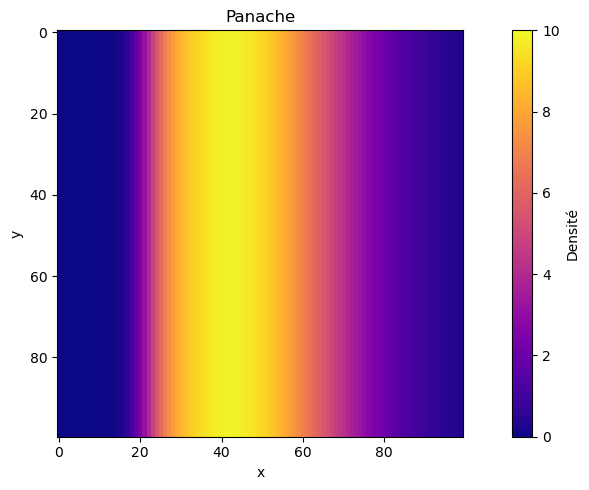

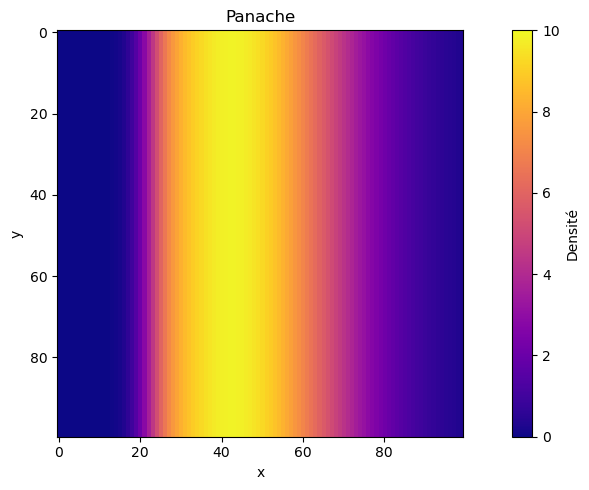

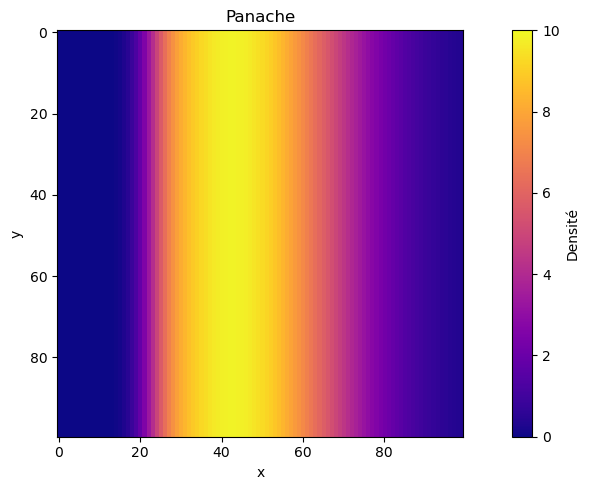

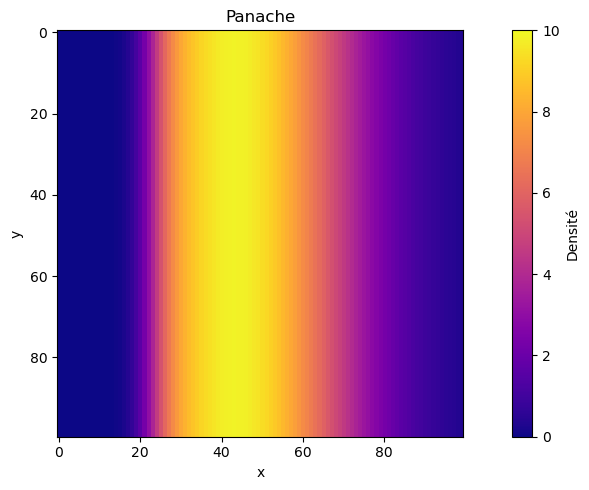

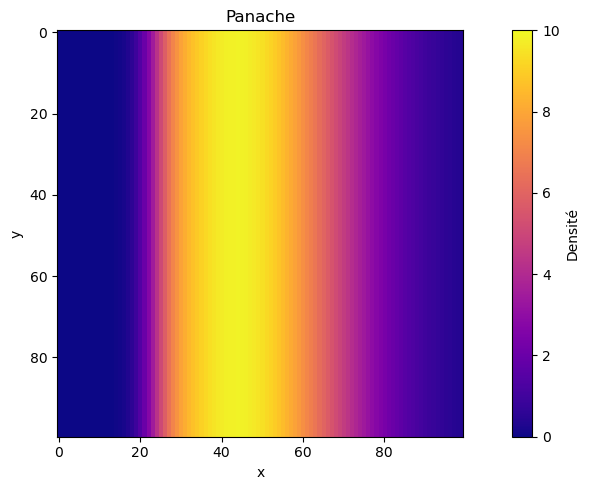

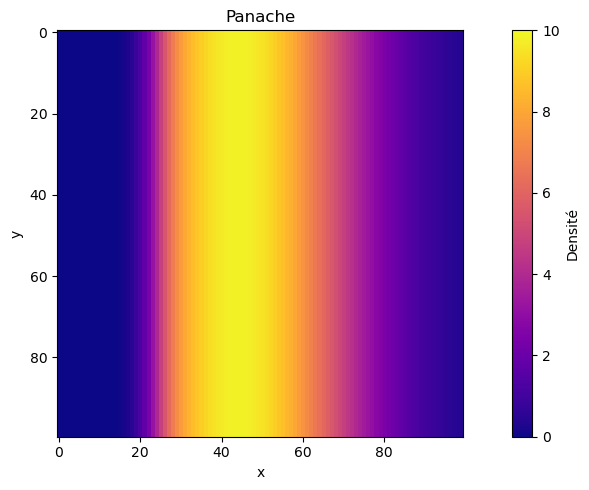

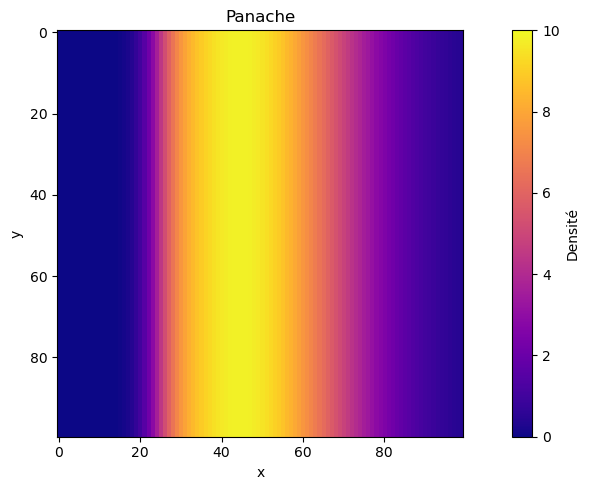

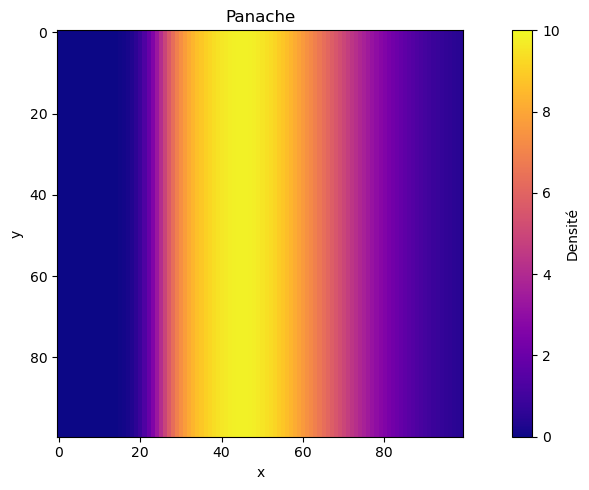

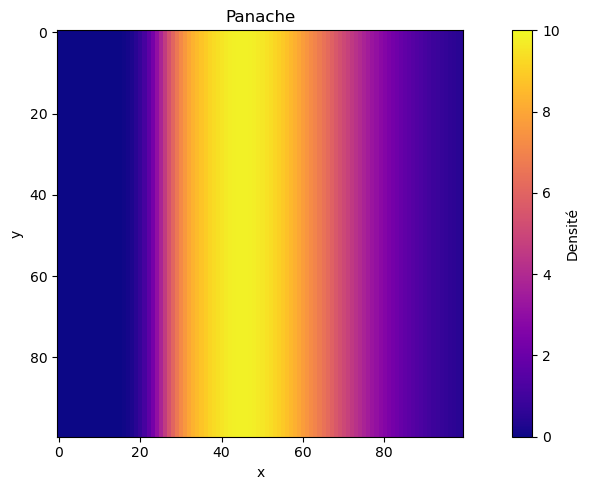

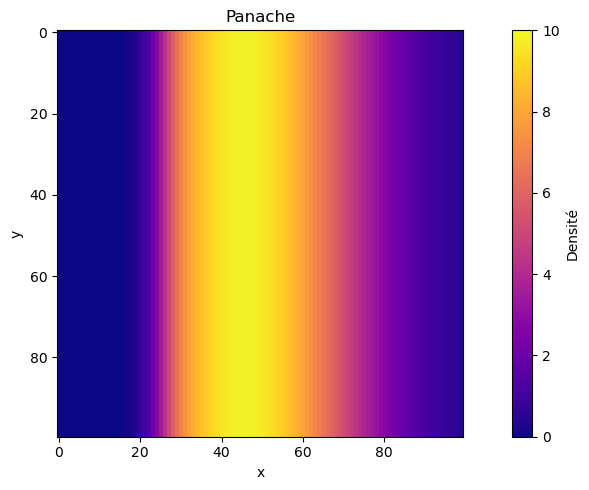

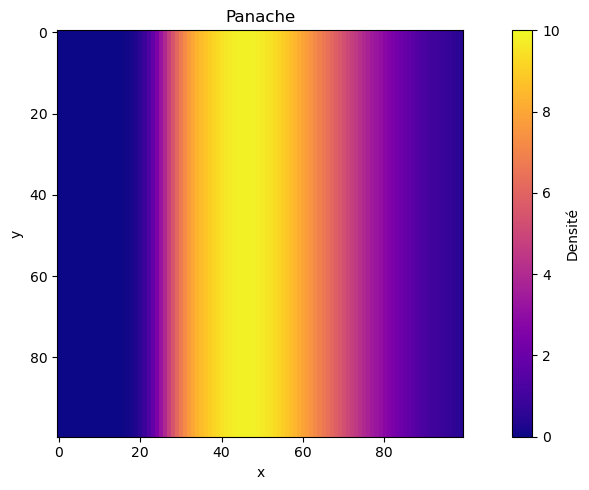

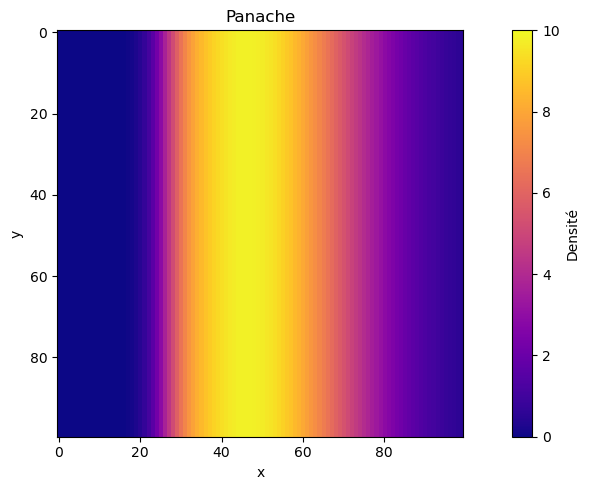

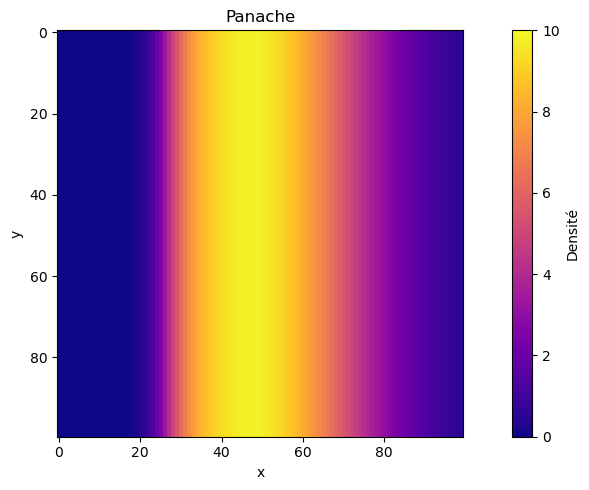

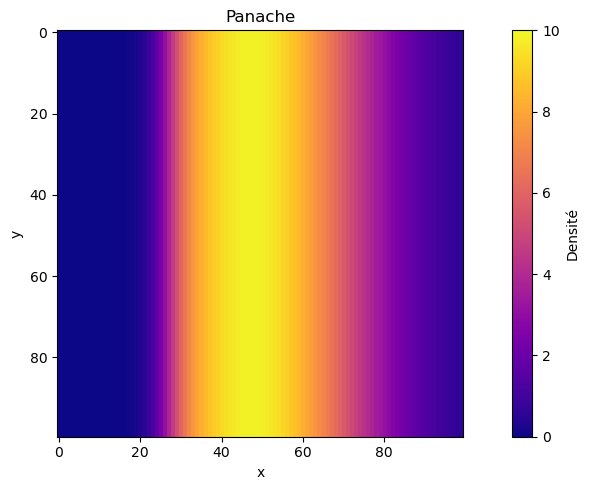

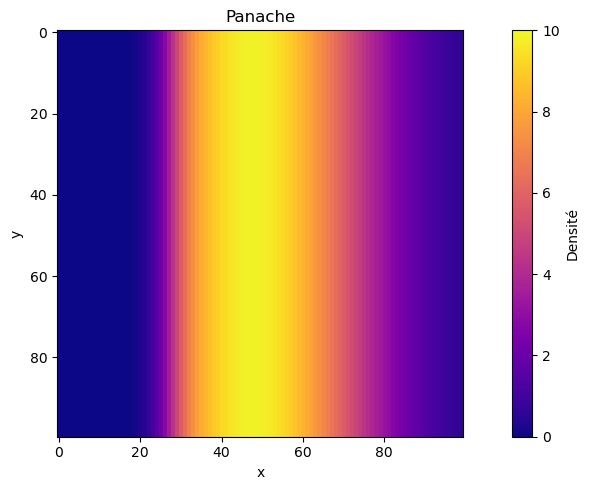

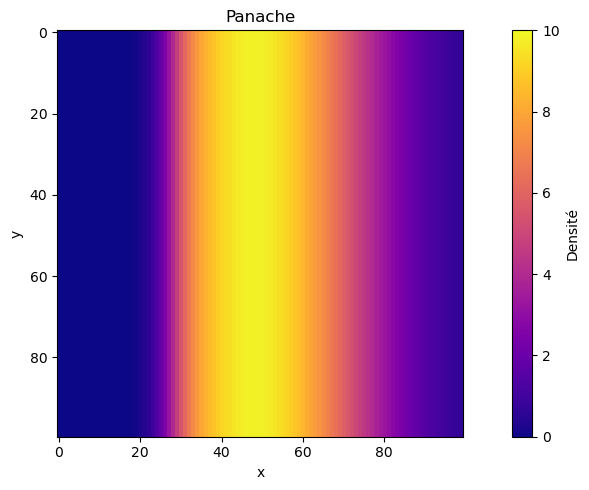

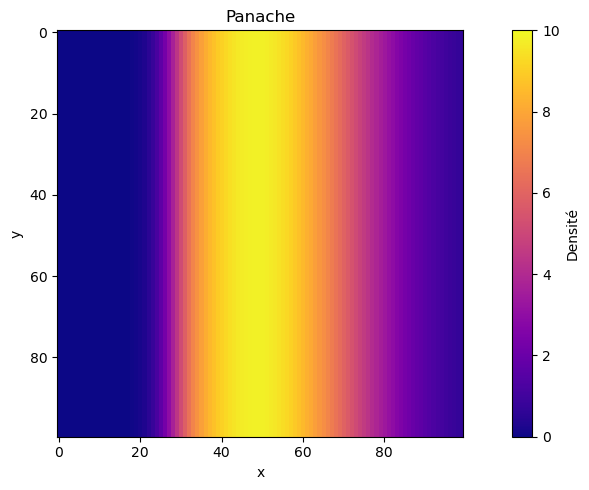

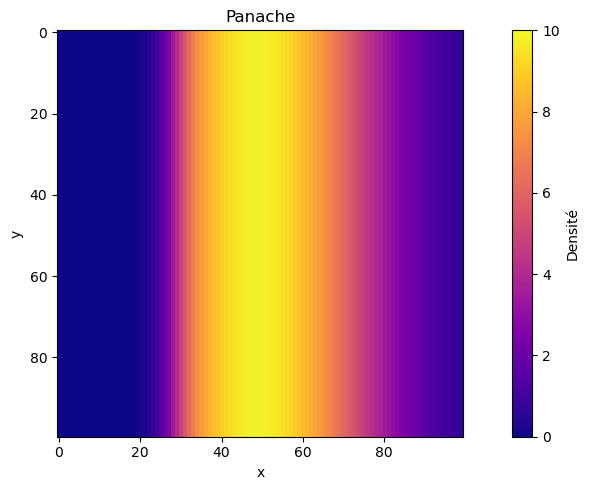

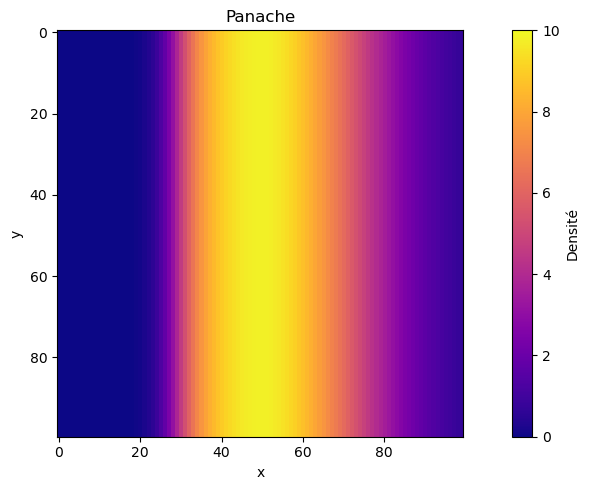

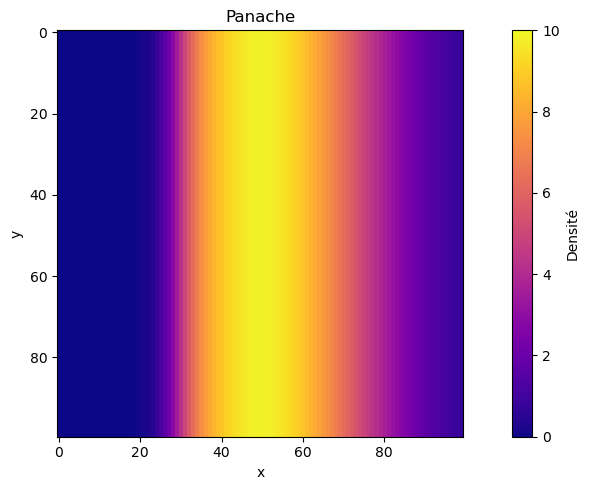

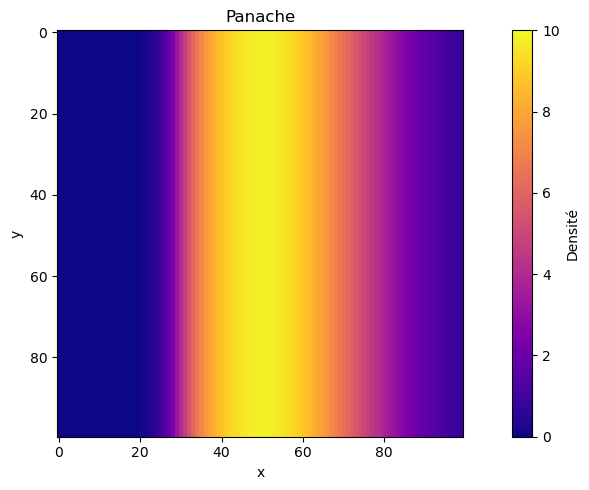

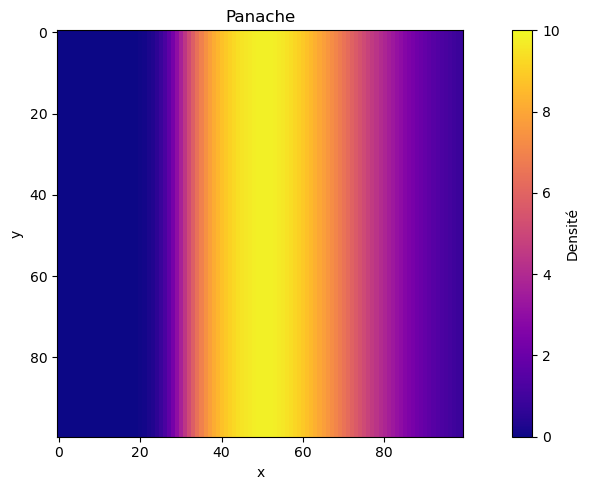

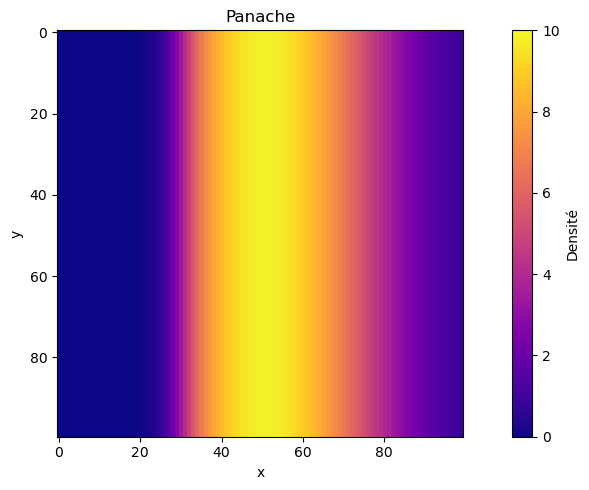

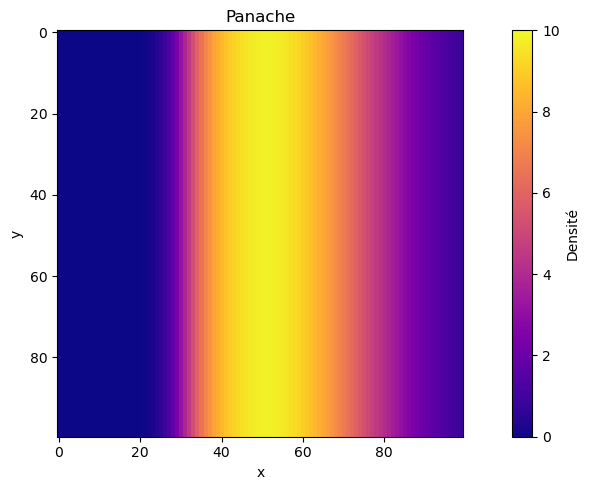

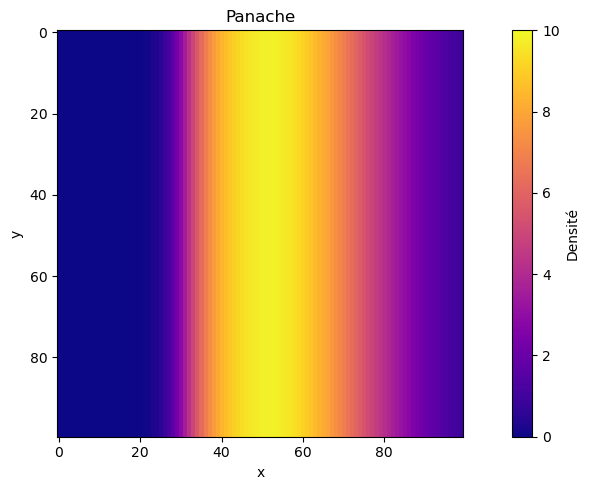

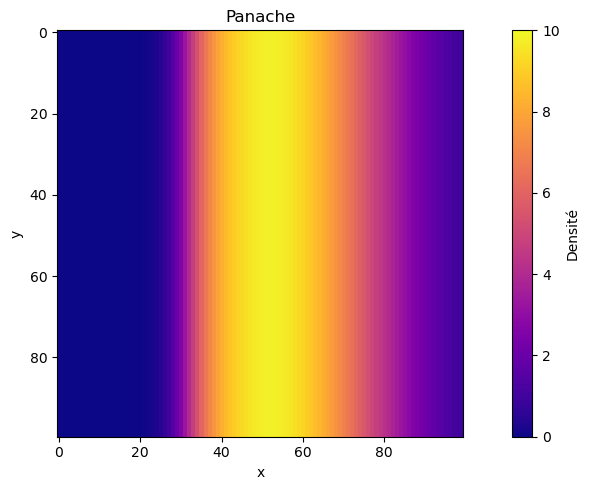

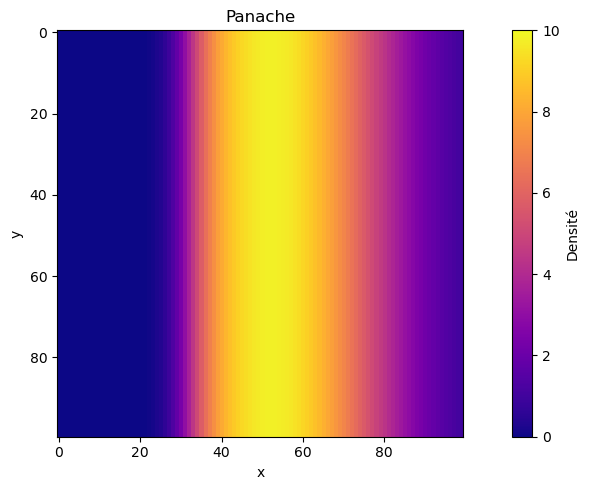

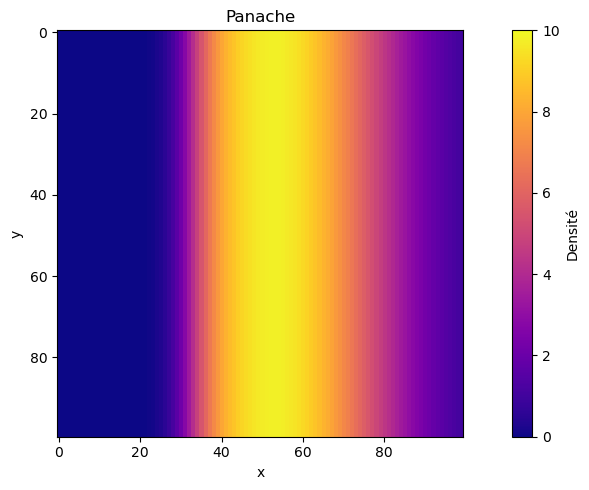

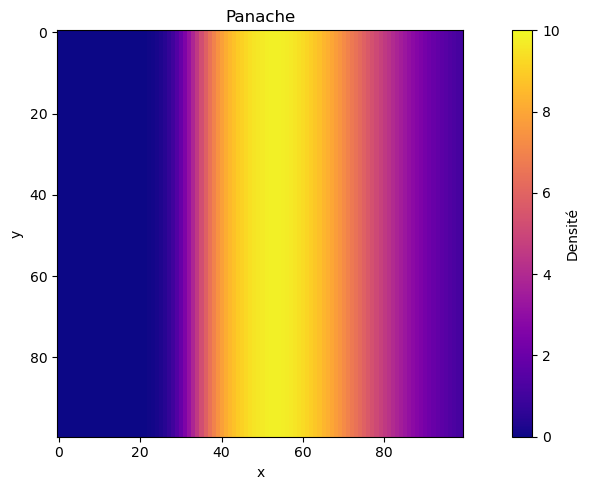

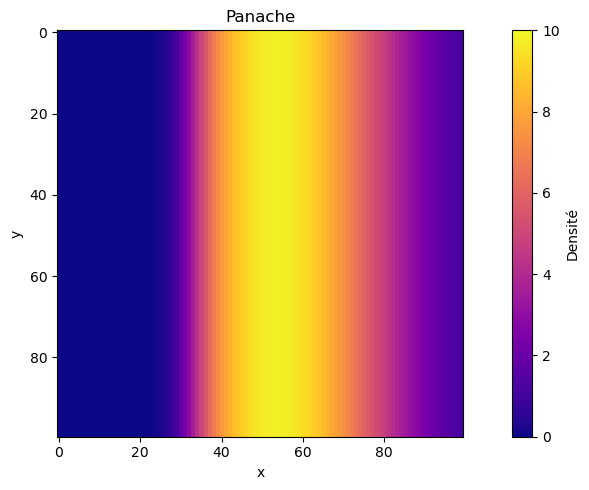

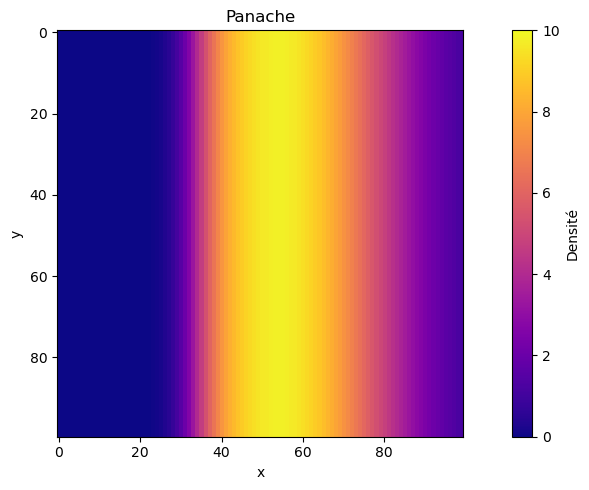

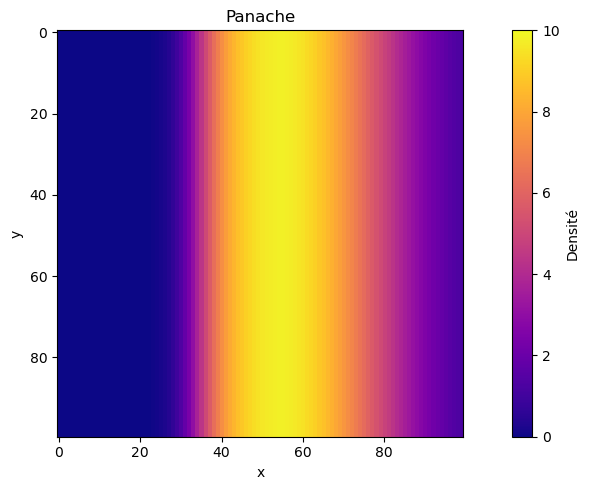

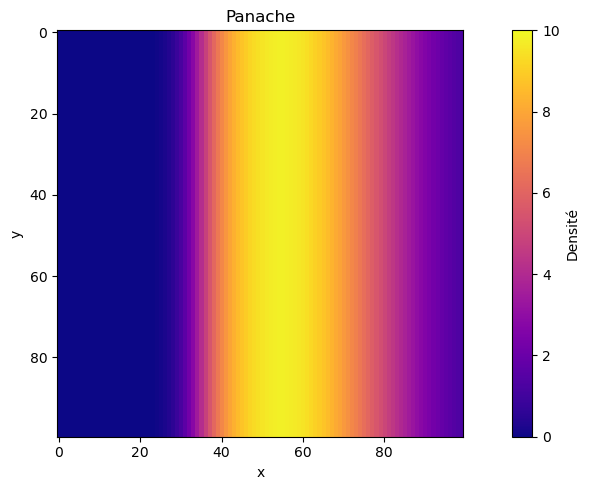

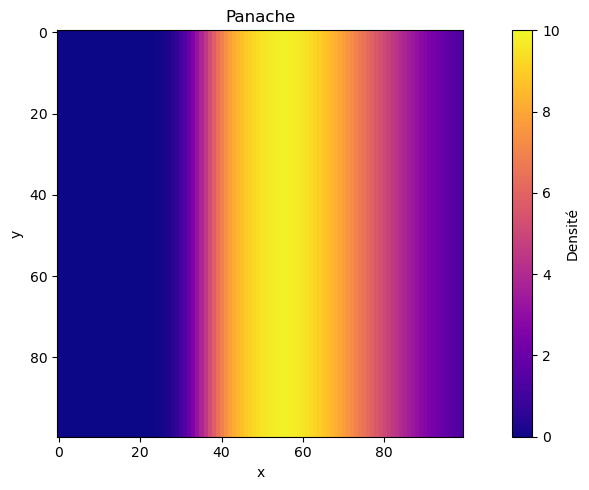

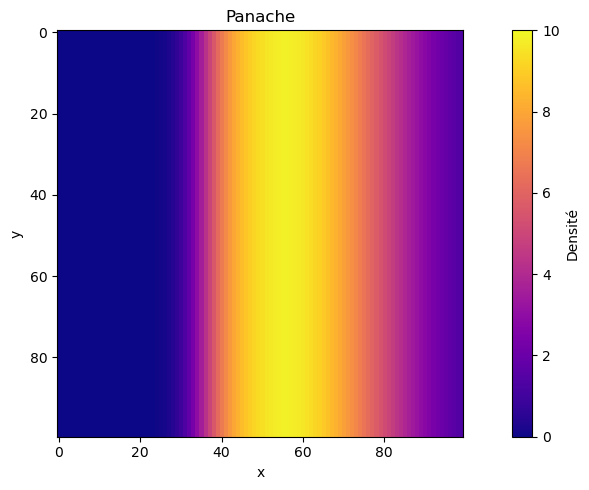

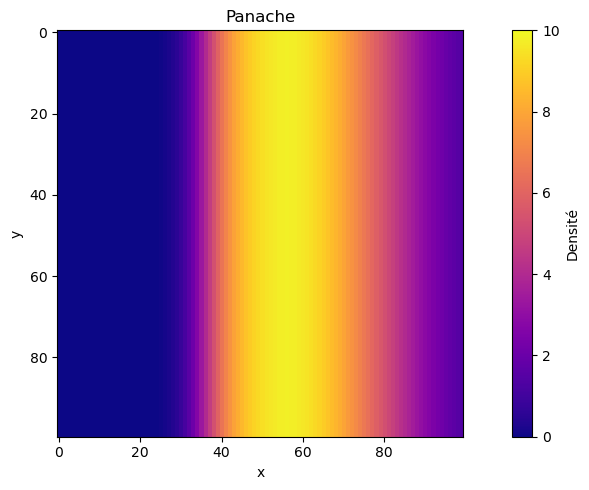

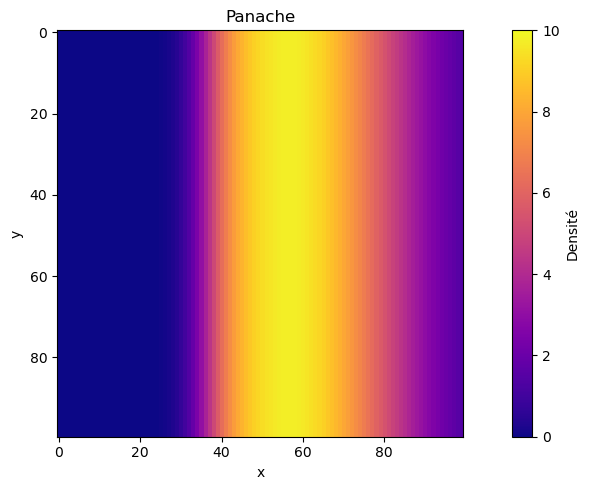

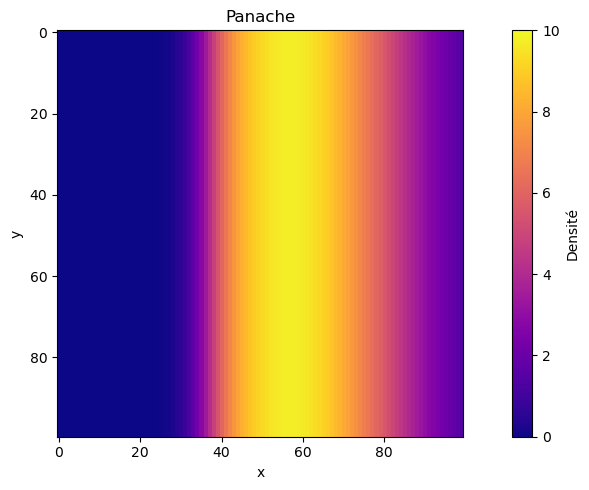

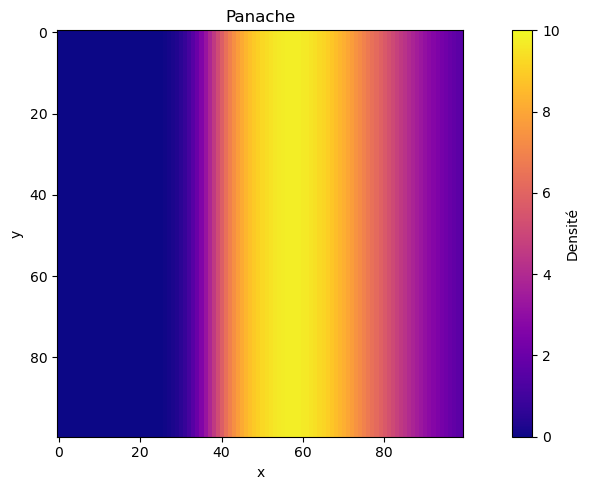

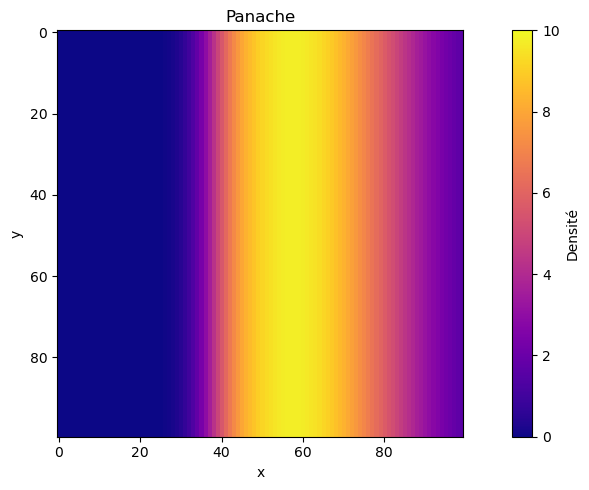

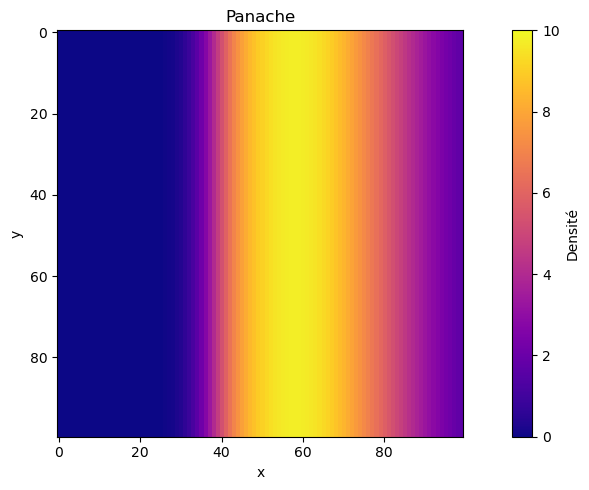

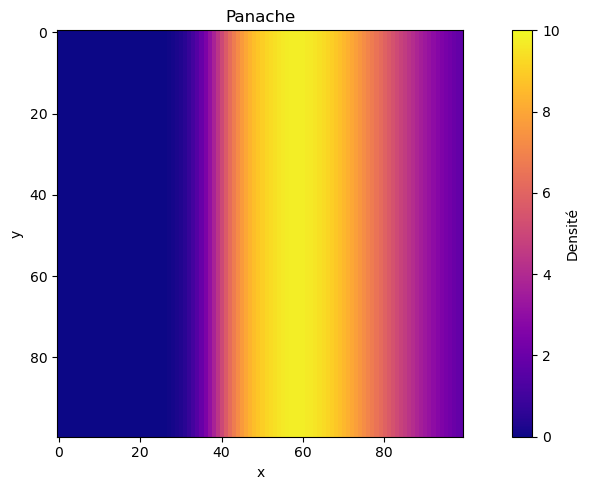

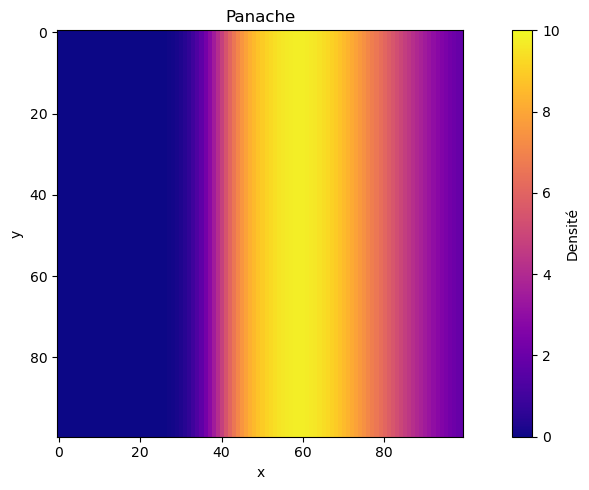

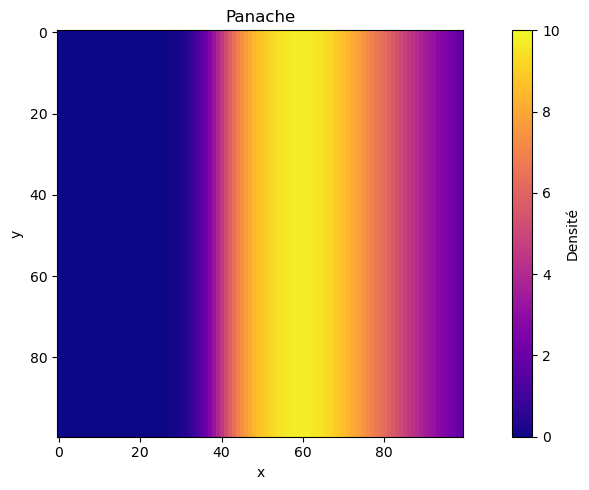

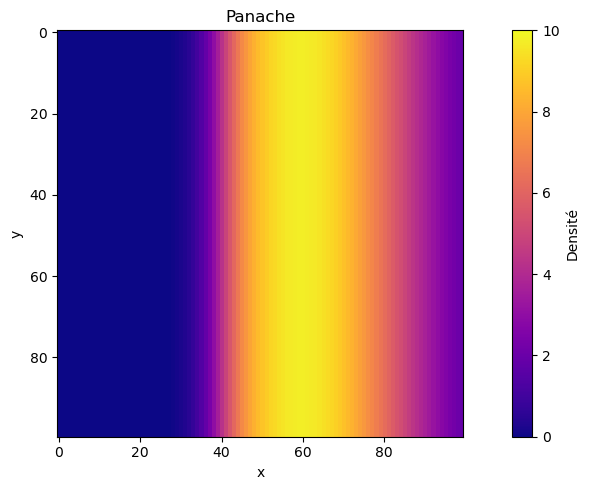

In [26]:
# Propagation en 2D

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import os
import imageio
# Longueur L
L = 10

# Vitesse con en metre/
u0 = 1/25
# Con
q0 = 10
def f(x,t):
    x0 = L/5
    sigmax = L/15
    sigmay = L/15
    return  q0*np.exp(-((x-(x0+u0*t))/2*sigmax)**2)

def init_panache(dim):
    mat = np.zeros((dim,dim))
    for i in range (dim):
        for j in range (dim):
            mat[i][j] = f(L*j/dim,0)

 
    return mat


def avancement(dim):
    panache_0 = init_panache(dim)
    panache = np.zeros((dim,dim,dim))
    panache[0] = panache_0
    a = (u0*dim/L)

    for t in range (1,100):
        for i in range (dim):
            for j in range (dim):
                if j == 0 :
                    panache[t][i][j] =  (-a + 1)*panache[t-1][i][j]
                else:
                    panache[t][i][j] =  (-a + 1)*panache[t-1][i][j] + a * panache[t-1][i][j-1] 
    
    #On crée les images et on les enregistre dans un fichier anim
    for i in range(0, 100):
        #liste_panache.append(panache[i])
        plt.rcParams["figure.figsize"] = [10, 5]
        plt.rcParams["figure.autolayout"] = True
        plt.imshow(panache[i], cmap="plasma")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar(label='Densité')
        plt.clim(0,10)            
        plt.title('Panache')
        plt.savefig(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_gaussienne/panache_{i}.png', dpi=500)
        plt.show()
    

avancement(100)


liste_fichier = []
liste_fichier = os.listdir("C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_gaussienne")
#print(liste_fichier)
liste_panache = []
for i in range(0,100):
    im = Image.open(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_gaussienne/panache_{i}.png')
    new_im = im.resize((1000, 500))
    liste_panache.append(new_im)

liste_panache[0].save('C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_gaussienne/panache_gaussienne.gif', save_all = True, append_images = liste_panache[1:], optimize = False, duration = 10)